# Preprocessing & Explore data
-------------


## Setting
------------------
전처리 작업을 위해 아래와 같은 python library를 import한다.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',999)
pd.set_option('max_rows',200)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

import datetime

matplotlib 라이브러리를 통해 시각화를 할 때 한글 폰트를 사용할 수 있게 하기 위해 아래와 같이 옵션을 지정한다.

In [2]:
# 한글 폰트 사용
plt.rcParams["font.family"] = 'NanumGothic'

기본 데이터를 불러와 데이터의 전반적인 모양을 확인한다.

In [3]:
projects = pd.read_csv('../ks-projects-201801.csv')

In [4]:
print(projects.shape)
projects.head()

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Explore Column By Column
------------------

### 1. state --> make "state_new"

state는 프로젝트의 상태를 나타내는 컬럼이다. 아래와 같이 시각화를 통해 확인한 결과, failed와 successful이 가장 많고 canceled, live, undefined, suspended가 그 뒤를 잇는다.

In [5]:
projects['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

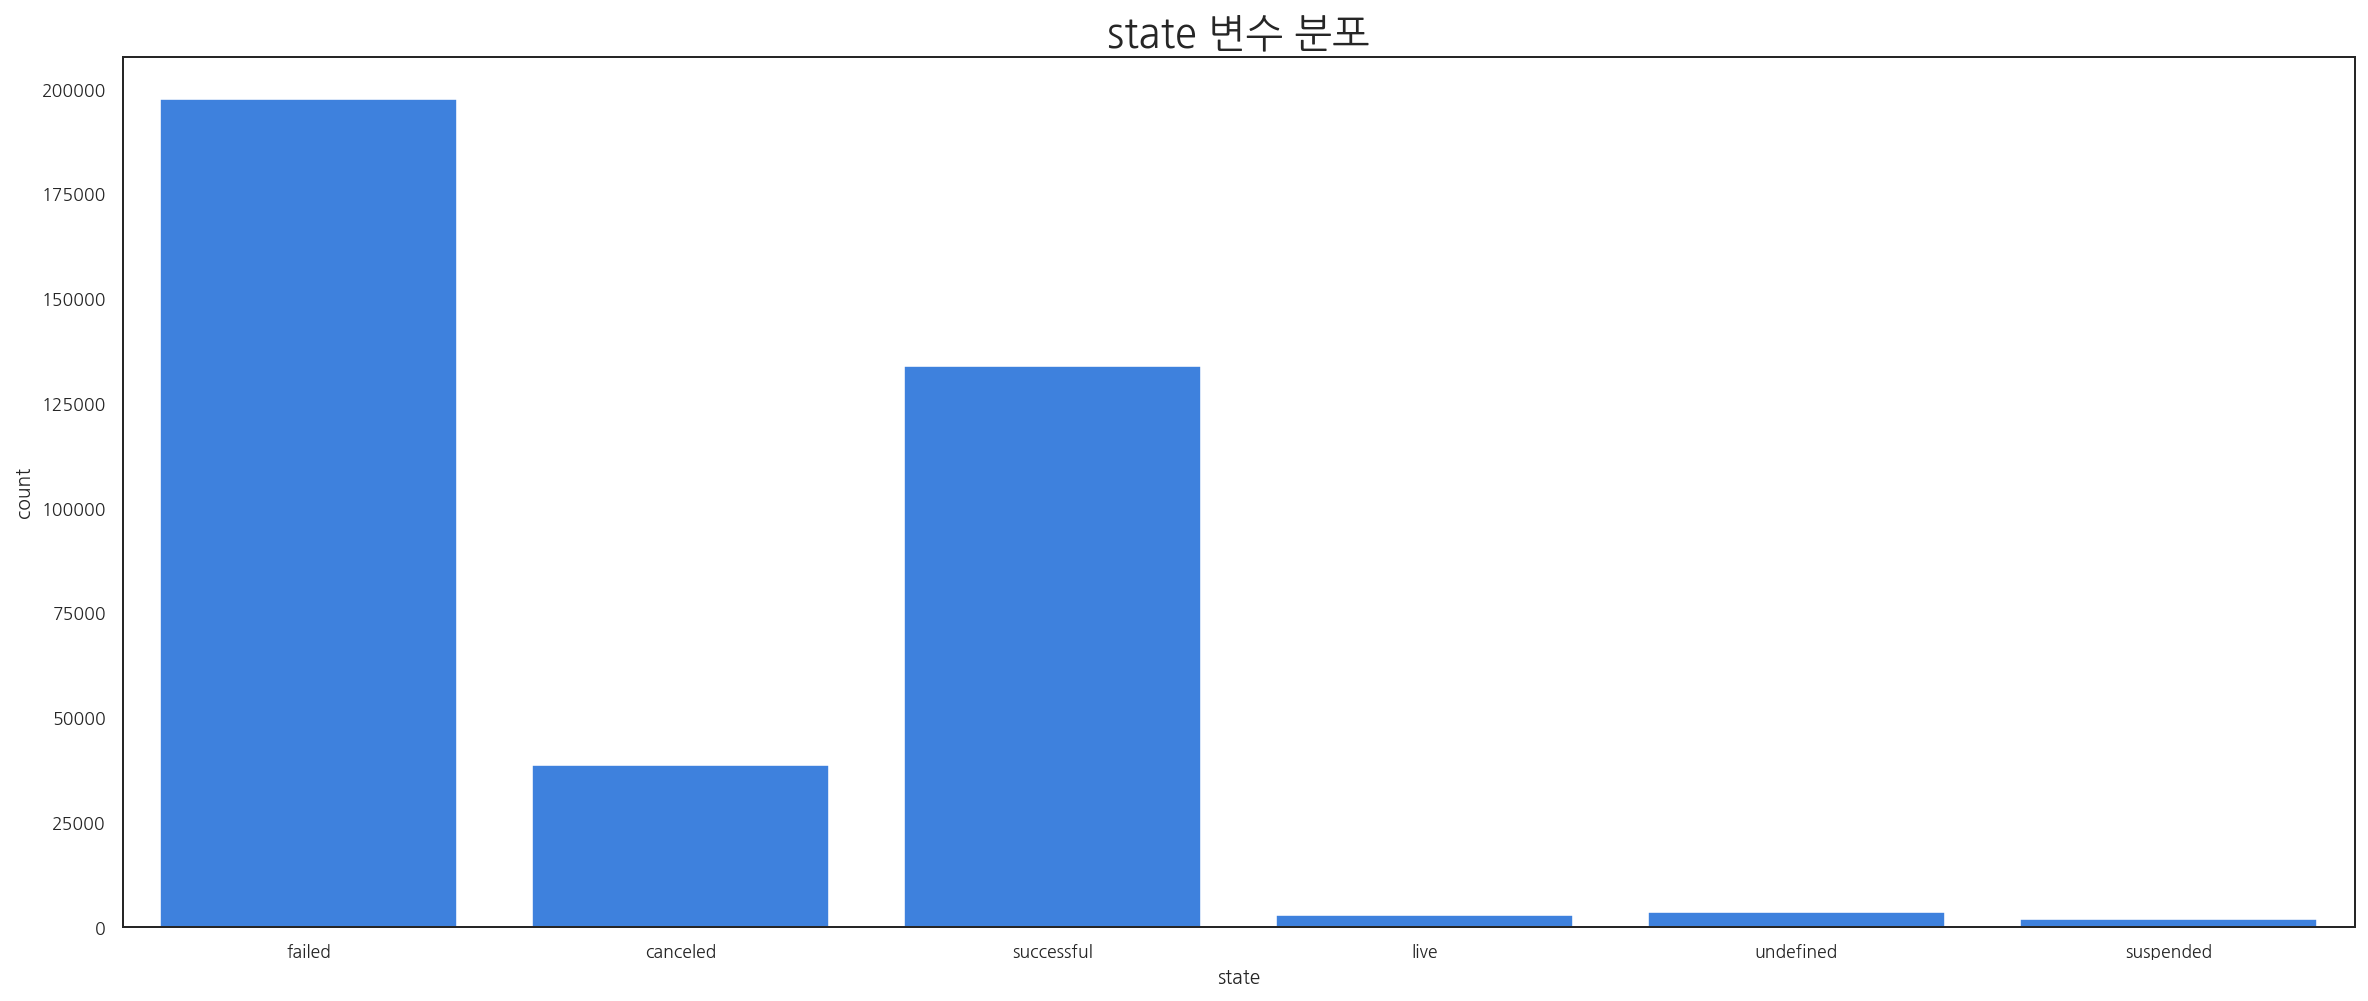

In [6]:
plt.figure(figsize=(20,8))
plt.title("state 변수 분포", fontsize = 20)
sns.countplot(x = 'state', data = projects, color = '#247DF7')

In [7]:
projects.groupby('state').count()['ID']

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

하지만 이 프로젝트의 주 목적은 '과연 펀딩 목표 금액만큼 펀딩을 받을 수 있을지'를 알아내는 것이다. 따라서 successful과 failed 이외에 나머지 상황은 고려대상에서 제외된다.  
이 기준에 따라 모금 금액이 목표 금액 이상이면 success, 미만이면 failed로 state를 재정의한 'state_new' 컬럼을 생성한다.

In [8]:
projects['state_new'] = projects.apply(lambda x: 'success' if x['usd_pledged_real'] >= x['usd_goal_real']
                                       else 'failed', axis = 1)

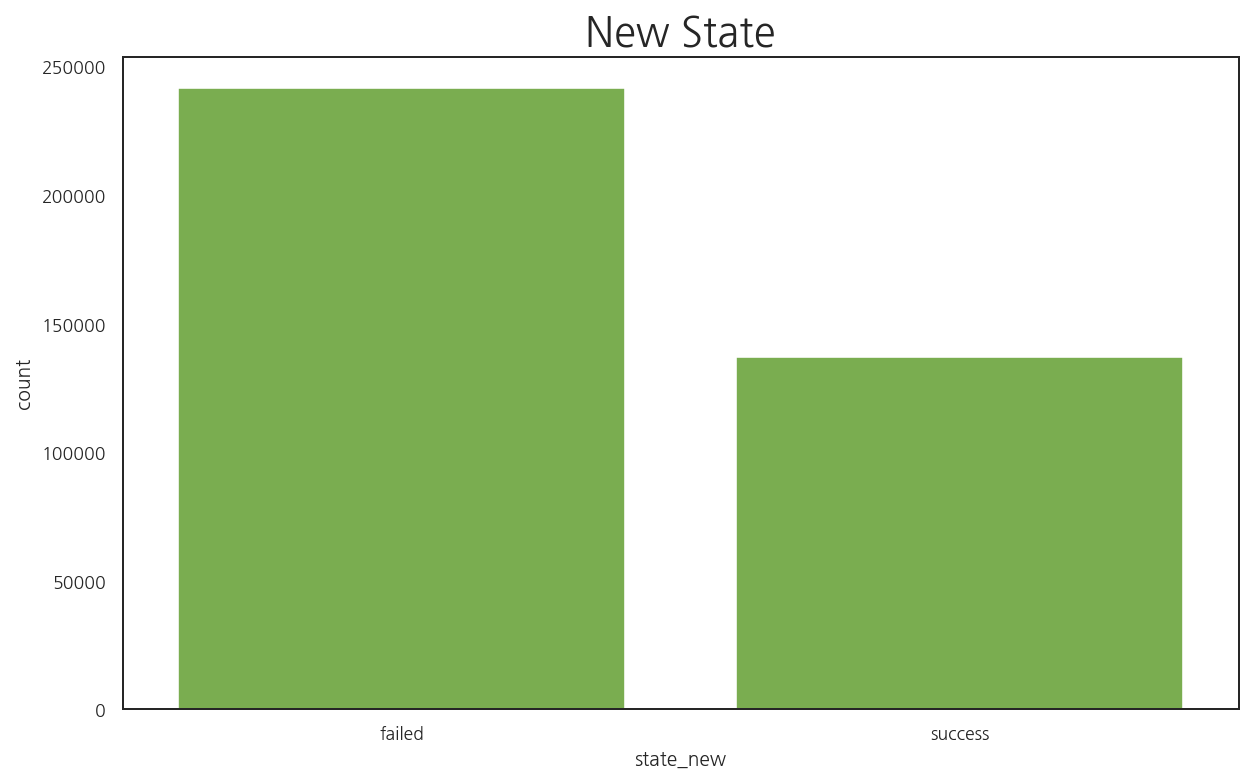

In [9]:
plt.figure(figsize=(10,6))
plt.title('New State', fontsize = 20)
sns.countplot(x = 'state_new', data = projects, color = '#78BD40')

In [10]:
projects.groupby('state_new').count()['ID']

state_new
failed     241619
success    137042
Name: ID, dtype: int64

### 2. main_category & category

각 프로젝트는 main category와 sub category에 속해있다. main category는 15개이며, 그 안에 속한 sub category는 무려 159개가 존재한다.

In [11]:
projects['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [13]:
projects['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

main category의 분포는 Film & Video가 가장 많고 그 다음을 Music, Publishing, Games 등이 잇고 있다.

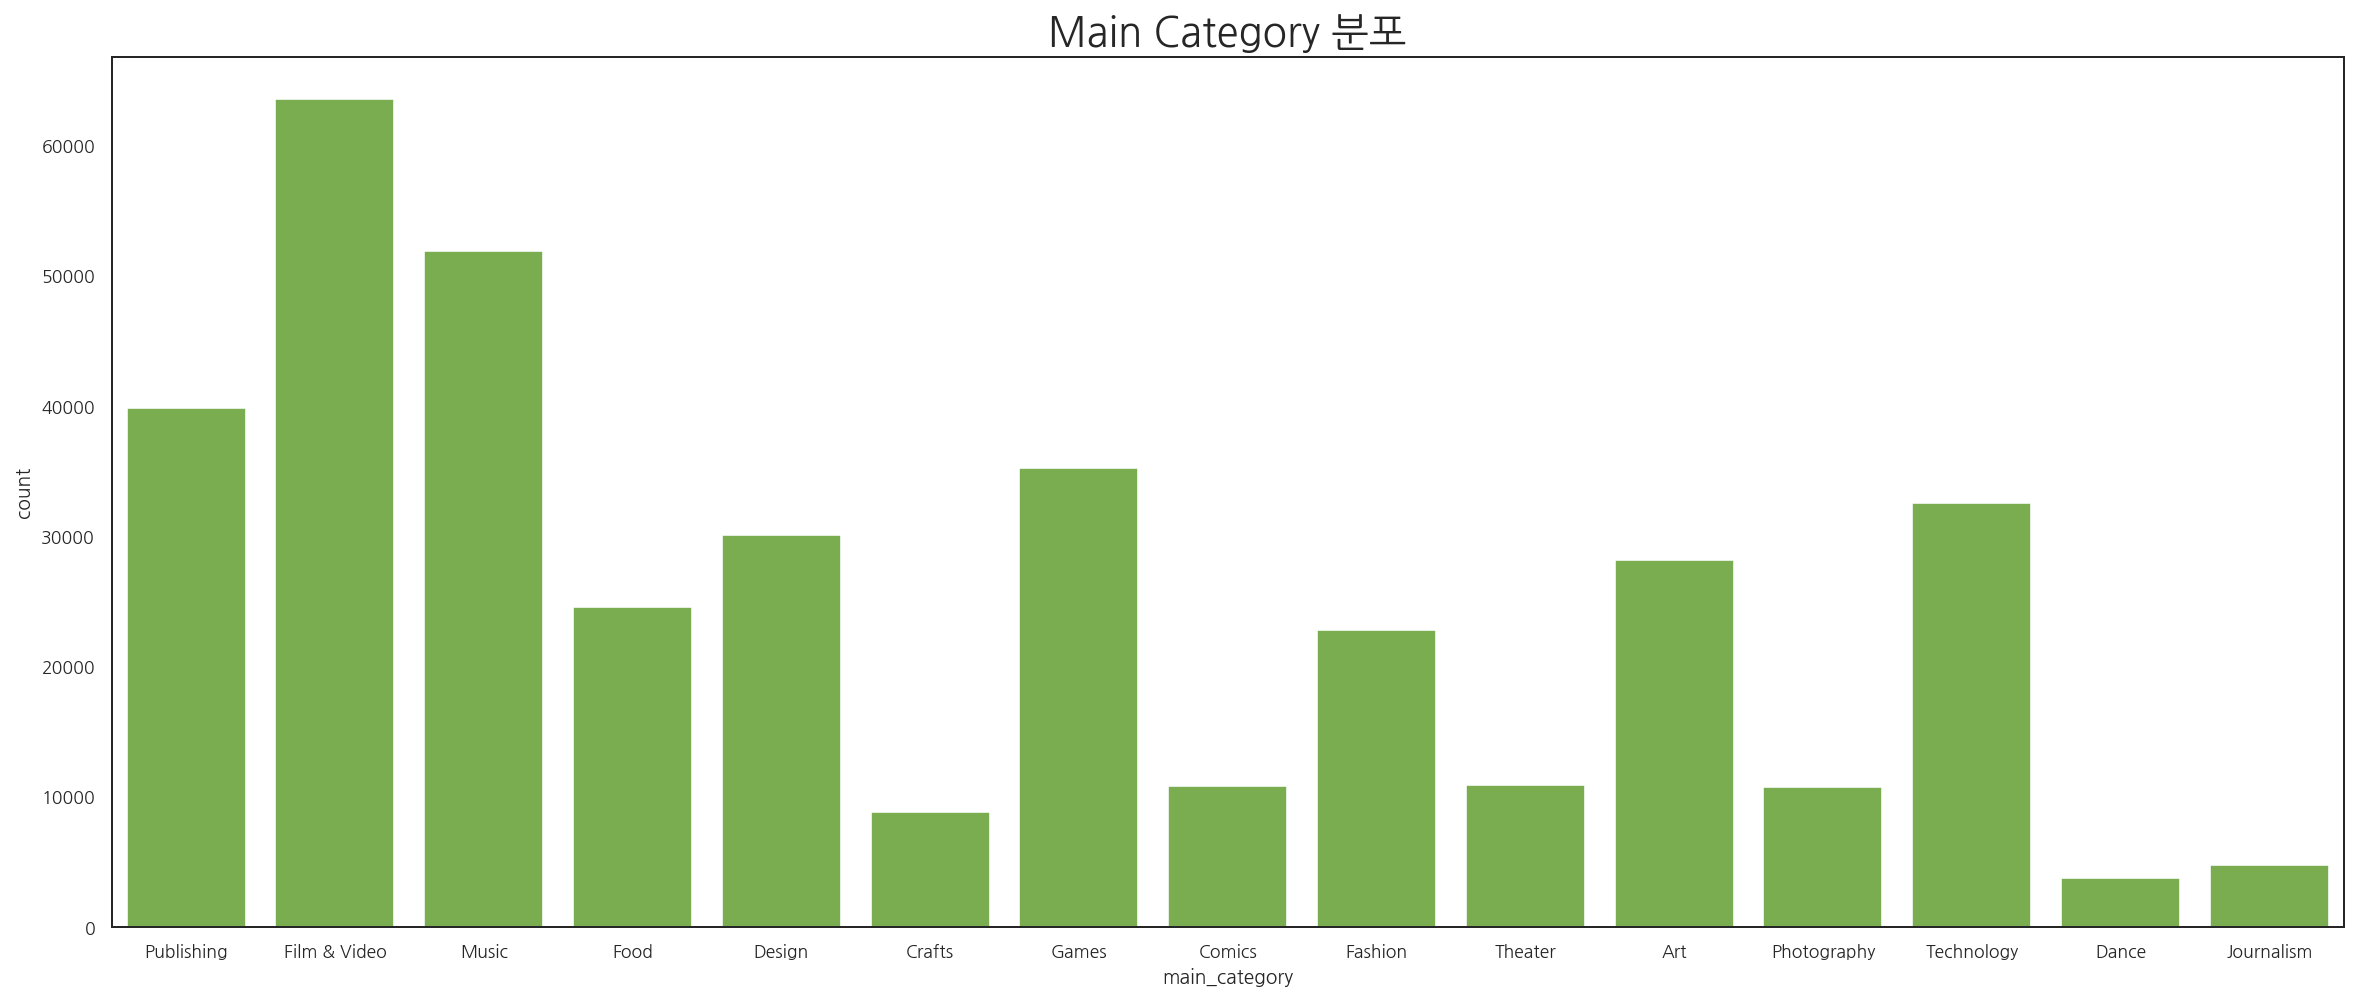

In [12]:
plt.figure(figsize=(20,8))
plt.title("Main Category 분포", fontsize = 20)
sns.countplot(x = 'main_category', data = projects, color = '#78BD40')

카테고리별 성공률을 확인해보면, 위에서 확인한 분포와 꽤 다른 양상을 보임을 알 수 있다. Dance, Theater, Comics, Music의 예술 계열의 성공률이 50%를 웃도는 높은 수치를 보였다.

In [42]:
cate = ['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism']

percent_list = []

for i in cate:
    cate_df = projects[lambda x: x['main_category'] == i]
    percent = len(cate_df[lambda x: x['state_new'] == 'success']) / len(cate_df) * 100
    percent_list.append(percent)
    
tmp = pd.DataFrame({'bars' : cate, 
                    'percent' : percent_list})

In [43]:
tmp

,bars,percent
0,Publishing,31.037769
1,Film & Video,37.843831
2,Music,49.237259
3,Food,25.111780
4,Design,36.148986
5,Crafts,24.270632
6,Games,36.181204
7,Comics,54.302616
8,Fashion,24.938640
9,Theater,60.029323


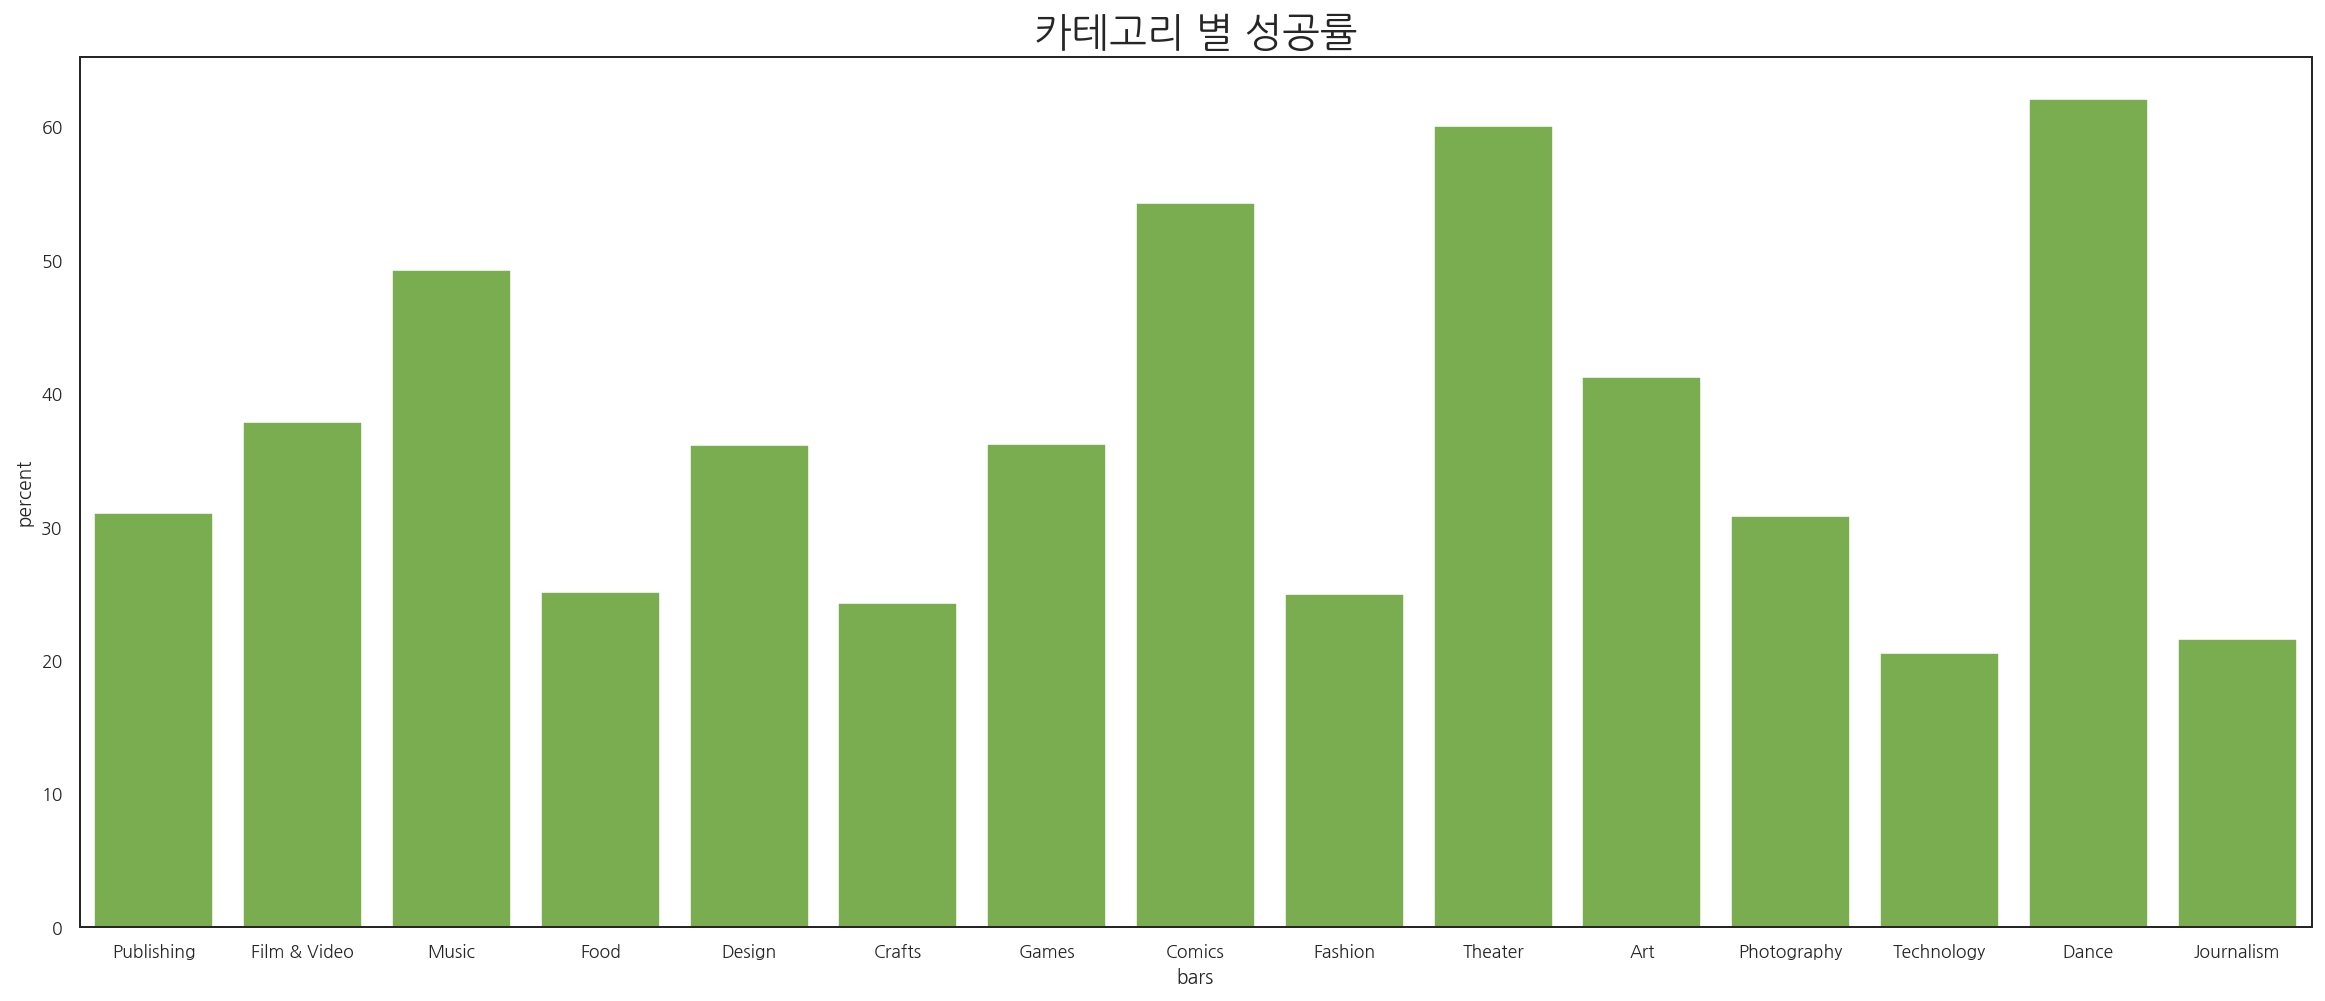

In [44]:
plt.figure(figsize=(20,8))
plt.title("카테고리 별 성공률", fontsize = 20)
sns.barplot(x = "bars", y = "percent", data = tmp, color = '#78BD40')

### 3. deadline & launched --> make "term", "term_str", "term_bin"
펀딩 시작 날짜와 종료 날짜가 담긴 컬럼 launched와 deadline을 datetime 형태로 변환하면 펀딩을 받는 기간을 확인할 수 있다. 펀딩을 받는 기간도 중요한 변수가 될 수 있기 때문에 새로운 컬럼으로 추가한다.

In [20]:
projects['deadline_dt'] = projects.apply(lambda x: datetime.datetime.strptime(x['deadline'], "%Y-%m-%d").date(), axis = 1)
projects['launched_dt'] = projects.apply(lambda x: datetime.datetime.strptime(x['launched'].split(" ")[0], "%Y-%m-%d").date(), axis = 1)

In [21]:
projects['term'] = projects.apply(lambda x: int(str(x['deadline_dt'] - x['launched_dt']).split(" ")[0]), axis = 1)
projects['term_str'] = projects.apply(lambda x: str(x['term']), axis = 1)

기간이 10000일이 넘는 잘못된 데이터가 포함되어 있음을 확인하였다. 이 데이터들은 프로젝트 시작 날짜가 1970년으로 되어있기 때문에 지워야한다. 따라서 term의 값이 100 미만인 데이터만 포함시키도록하는 전처리 과정을 진행한다.

In [22]:
projects['term'].unique()

array([   59,    60,    45,    30,    56,    35,    20,    28,    15,
          31,    40,    11,    25,    48,    41,    29,    42,    43,
          53,    34,    22,    17,    44,    46,    32,    66,    49,
          36,    61,    38,    37,    18,    33,    14,     5,    55,
          26,    51,    27,    19,    24,    52,    21,    16,    50,
          87,    23,    39,    13,    12,    10,    57,    83,     8,
          54,    90,     6,    47,    71,     9,    62,     1,     7,
          73,    58,    64,    91,     3,    89, 14867,    70,    69,
          72,     4,    68,    85,    67,    74,    81,    84,    88,
          75,     2,    65,    76,    63,    80,    79,    86,    78,
          82,    77,    92, 14835, 14750, 14761, 14733, 14709, 16739],
      dtype=int64)

In [23]:
projects[lambda x: x['term'] > 100]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state_new,deadline_dt,launched_dt,term,term_str
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,5000.00,failed,2010-09-15,1970-01-01,14867,14867
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,15000.00,failed,2010-08-14,1970-01-01,14835,14835
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,700.00,failed,2010-05-21,1970-01-01,14750,14750
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,4000.00,failed,2010-06-01,1970-01-01,14761,14761
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,10000.00,failed,2010-05-04,1970-01-01,14733,14733
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,500.00,failed,2010-04-10,1970-01-01,14709,14709
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,0,CH,0.0,0.0,1905.97,failed,2015-10-31,1970-01-01,16739,16739


In [25]:
projects_new = projects[lambda x: x['term'] < 100]

In [26]:
projects_new['term'].unique()

array([59, 60, 45, 30, 56, 35, 20, 28, 15, 31, 40, 11, 25, 48, 41, 29, 42,
       43, 53, 34, 22, 17, 44, 46, 32, 66, 49, 36, 61, 38, 37, 18, 33, 14,
        5, 55, 26, 51, 27, 19, 24, 52, 21, 16, 50, 87, 23, 39, 13, 12, 10,
       57, 83,  8, 54, 90,  6, 47, 71,  9, 62,  1,  7, 73, 58, 64, 91,  3,
       89, 70, 69, 72,  4, 68, 85, 67, 74, 81, 84, 88, 75,  2, 65, 76, 63,
       80, 79, 86, 78, 82, 77, 92], dtype=int64)

In [27]:
projects_new = projects_new.reset_index().drop(['index'], axis = 1)

In [28]:
projects_new['term_str'] = projects_new.apply(lambda x: x['term_str'] if len(x['term_str']) != 1
                                             else '0' + x['term_str'], axis = 1)

아래 그래프를 보면 펀딩 기간이 1일부터 92일까지로 매우 다양하게 분포되어 있음을 알 수 있다. 많은 프로젝트가 각자의 상황에 맞추어 펀딩 기간을 설정하고는 있지만, 30일과 60일처럼 특정 단위로 끊어지는 구간에서 대부분의 프로젝트가 기간을 설정하고 있음을 알 수 있다. 따라서 저렇게 다양한 일수로 프로젝트의 펀딩 기간을 규정짓는 것보다, 구간을 나누어서 보면 더 많은 insight를 얻을 수 있을 것 같다.

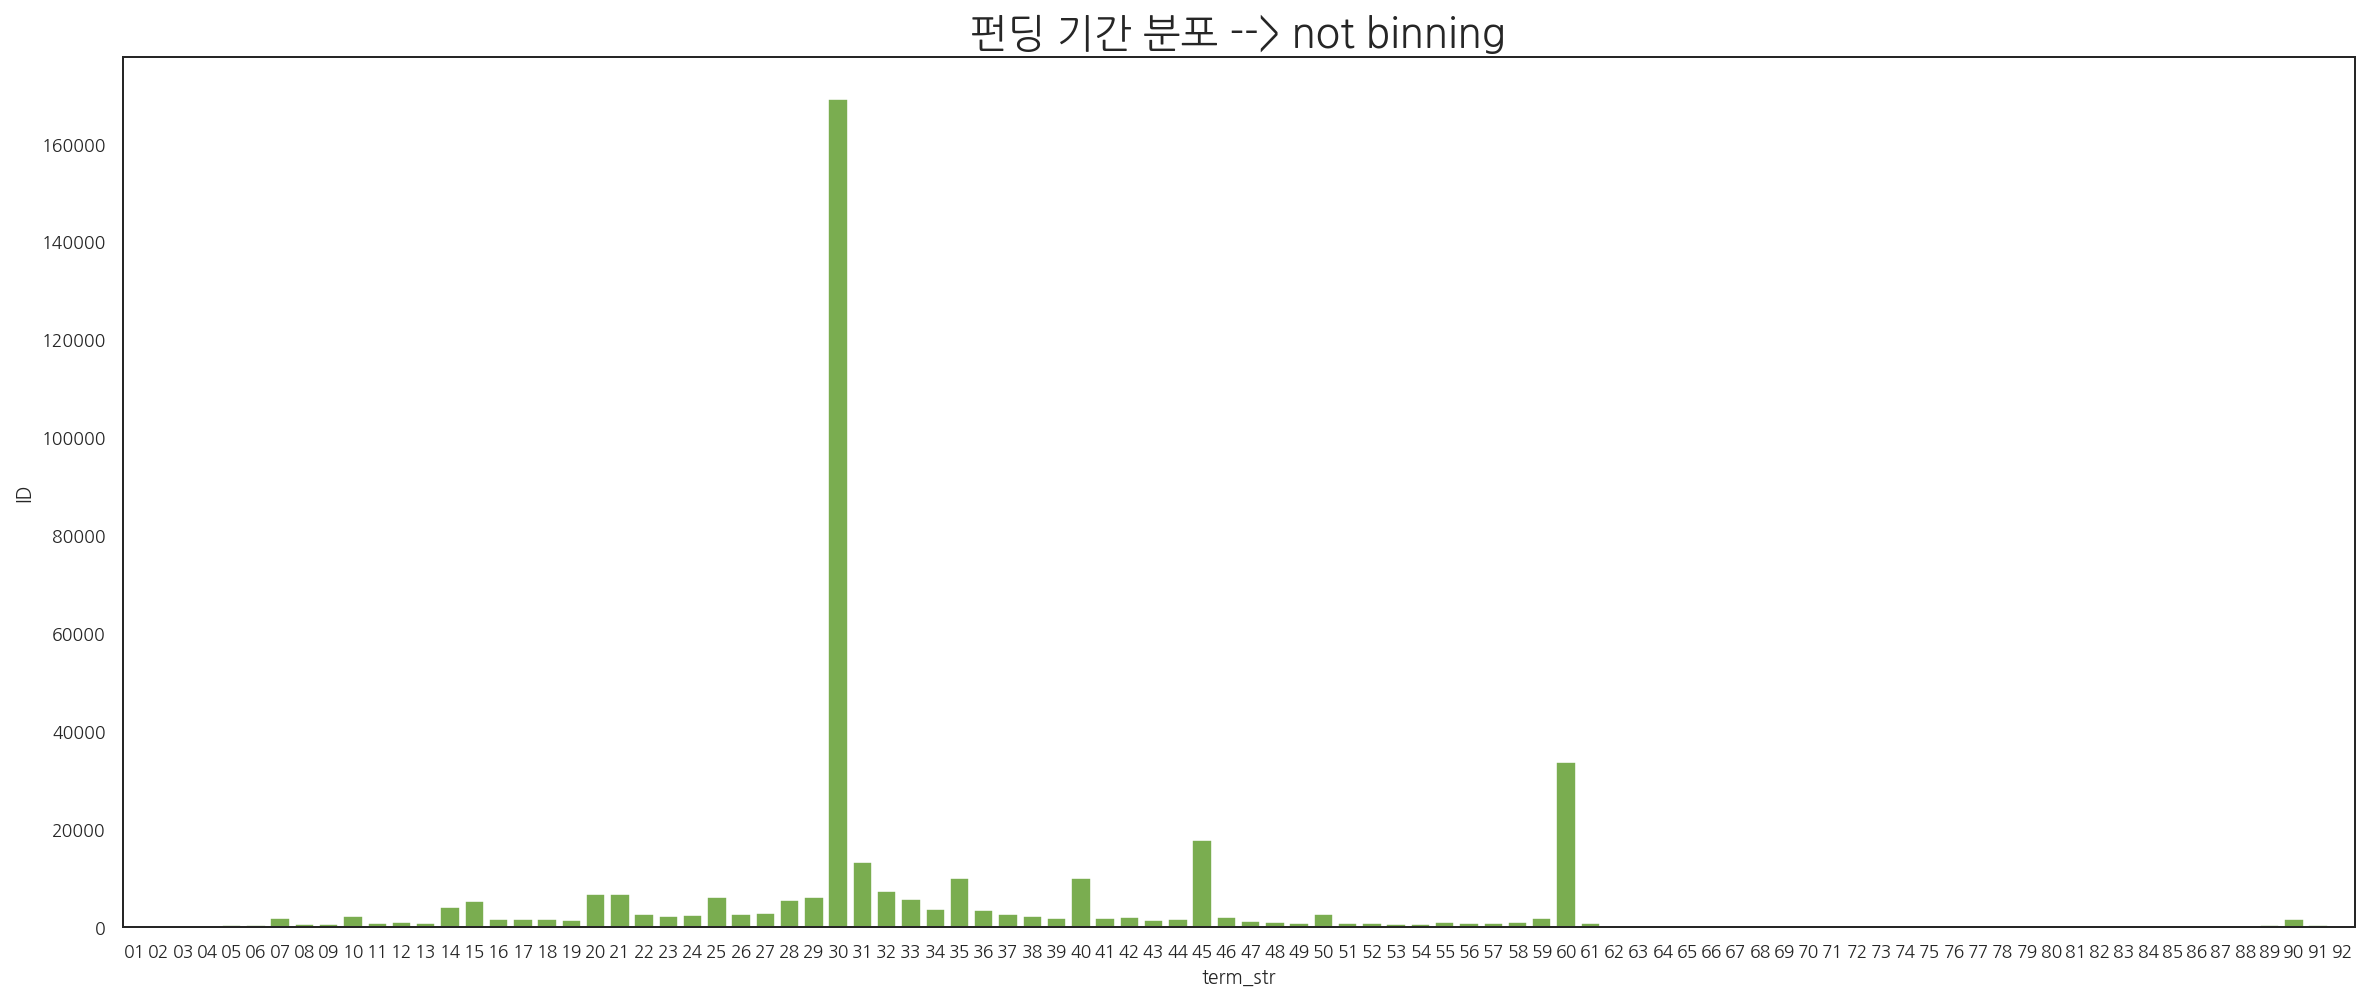

In [29]:
tmp = projects_new.groupby('term_str').count()[['ID']].reset_index()
plt.figure(figsize=(20,8))
sns.despine()
plt.title("펀딩 기간 분포 --> not binning", fontsize = 20)
sns.barplot(x = "term_str", y = "ID", data = tmp, color = '#78BD40')

10일, 15일, 21일을 기준으로 여러 프로젝트가 몰려있다.

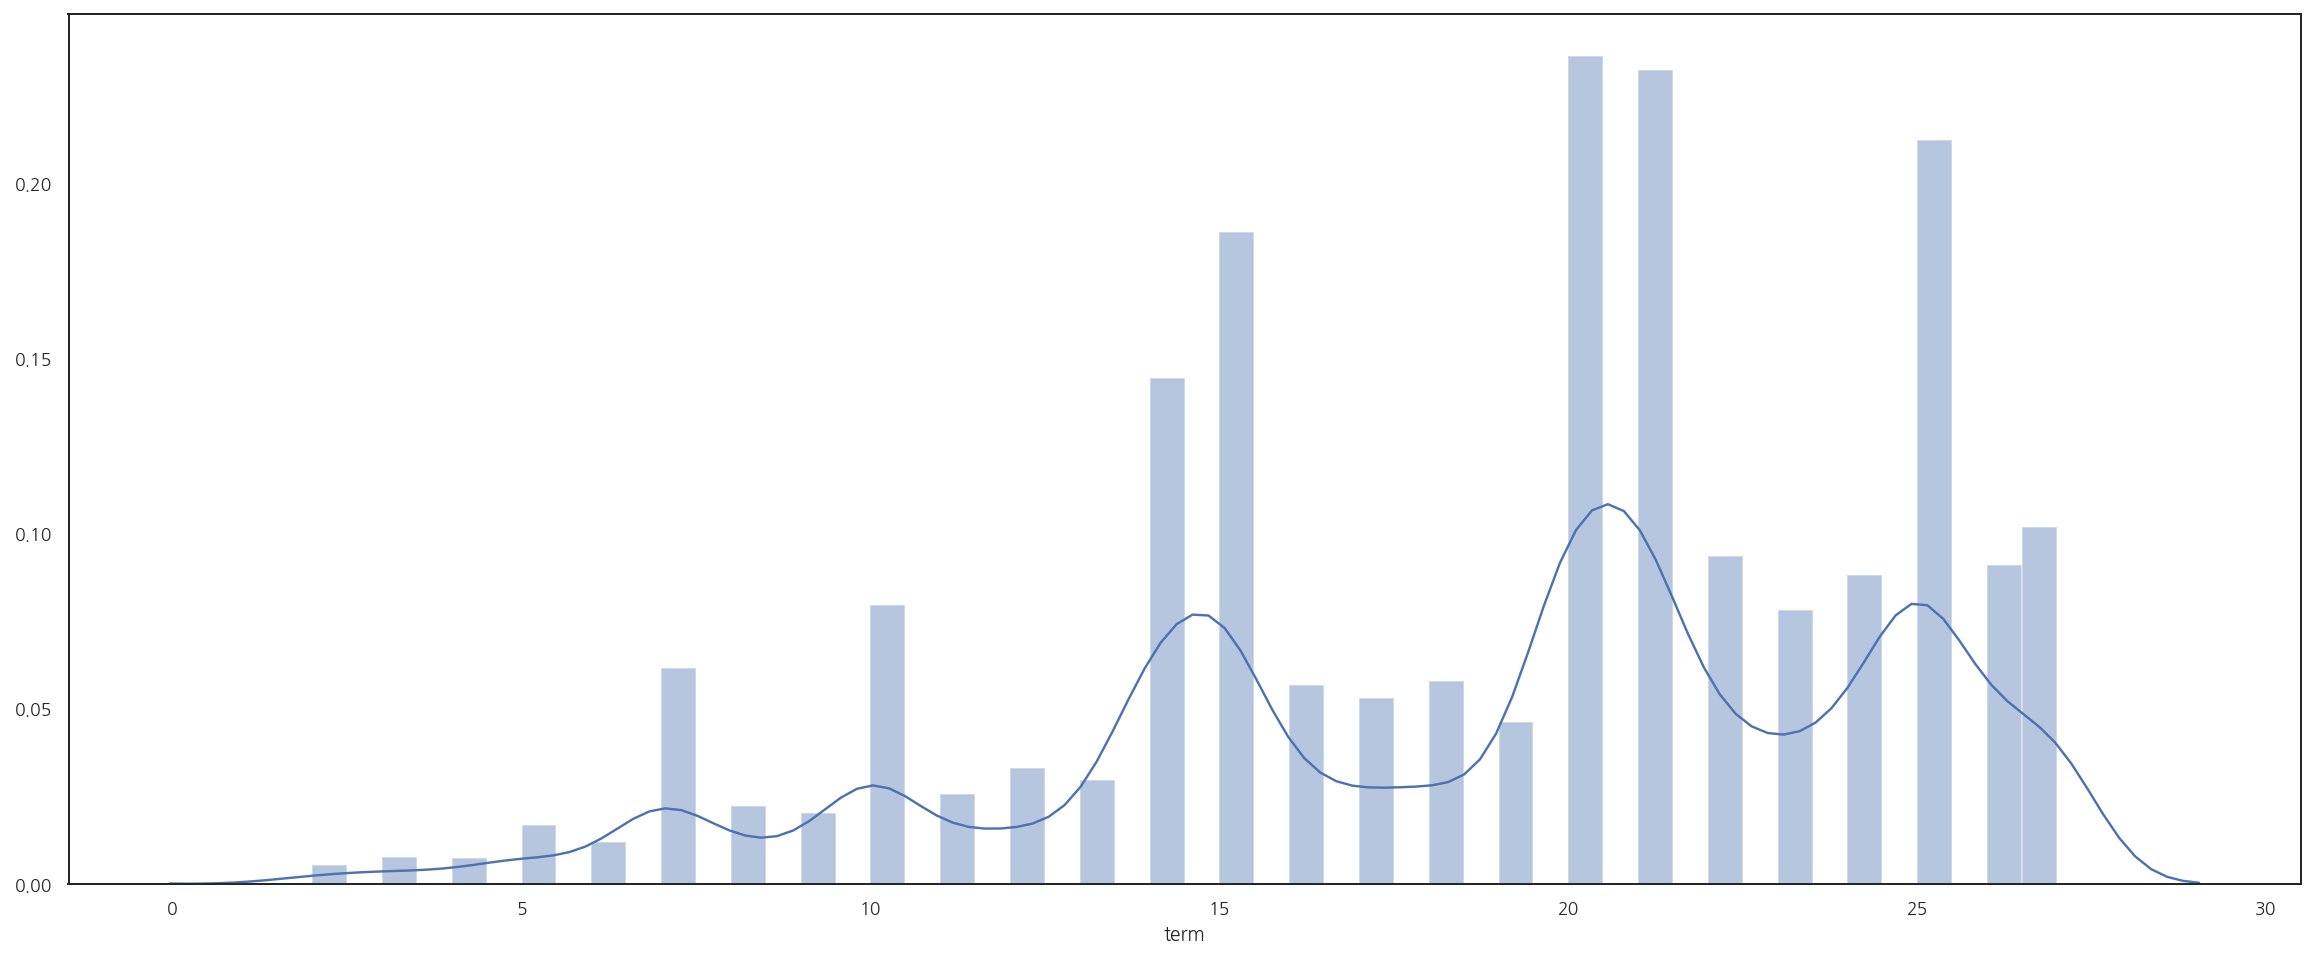

In [30]:
tmp2 = projects_new[lambda x: (x['term'] > 1) & (x['term'] < 28)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['term'])

30일, 45일, 60일을 기준으로 여러 프로젝트가 모여있다.

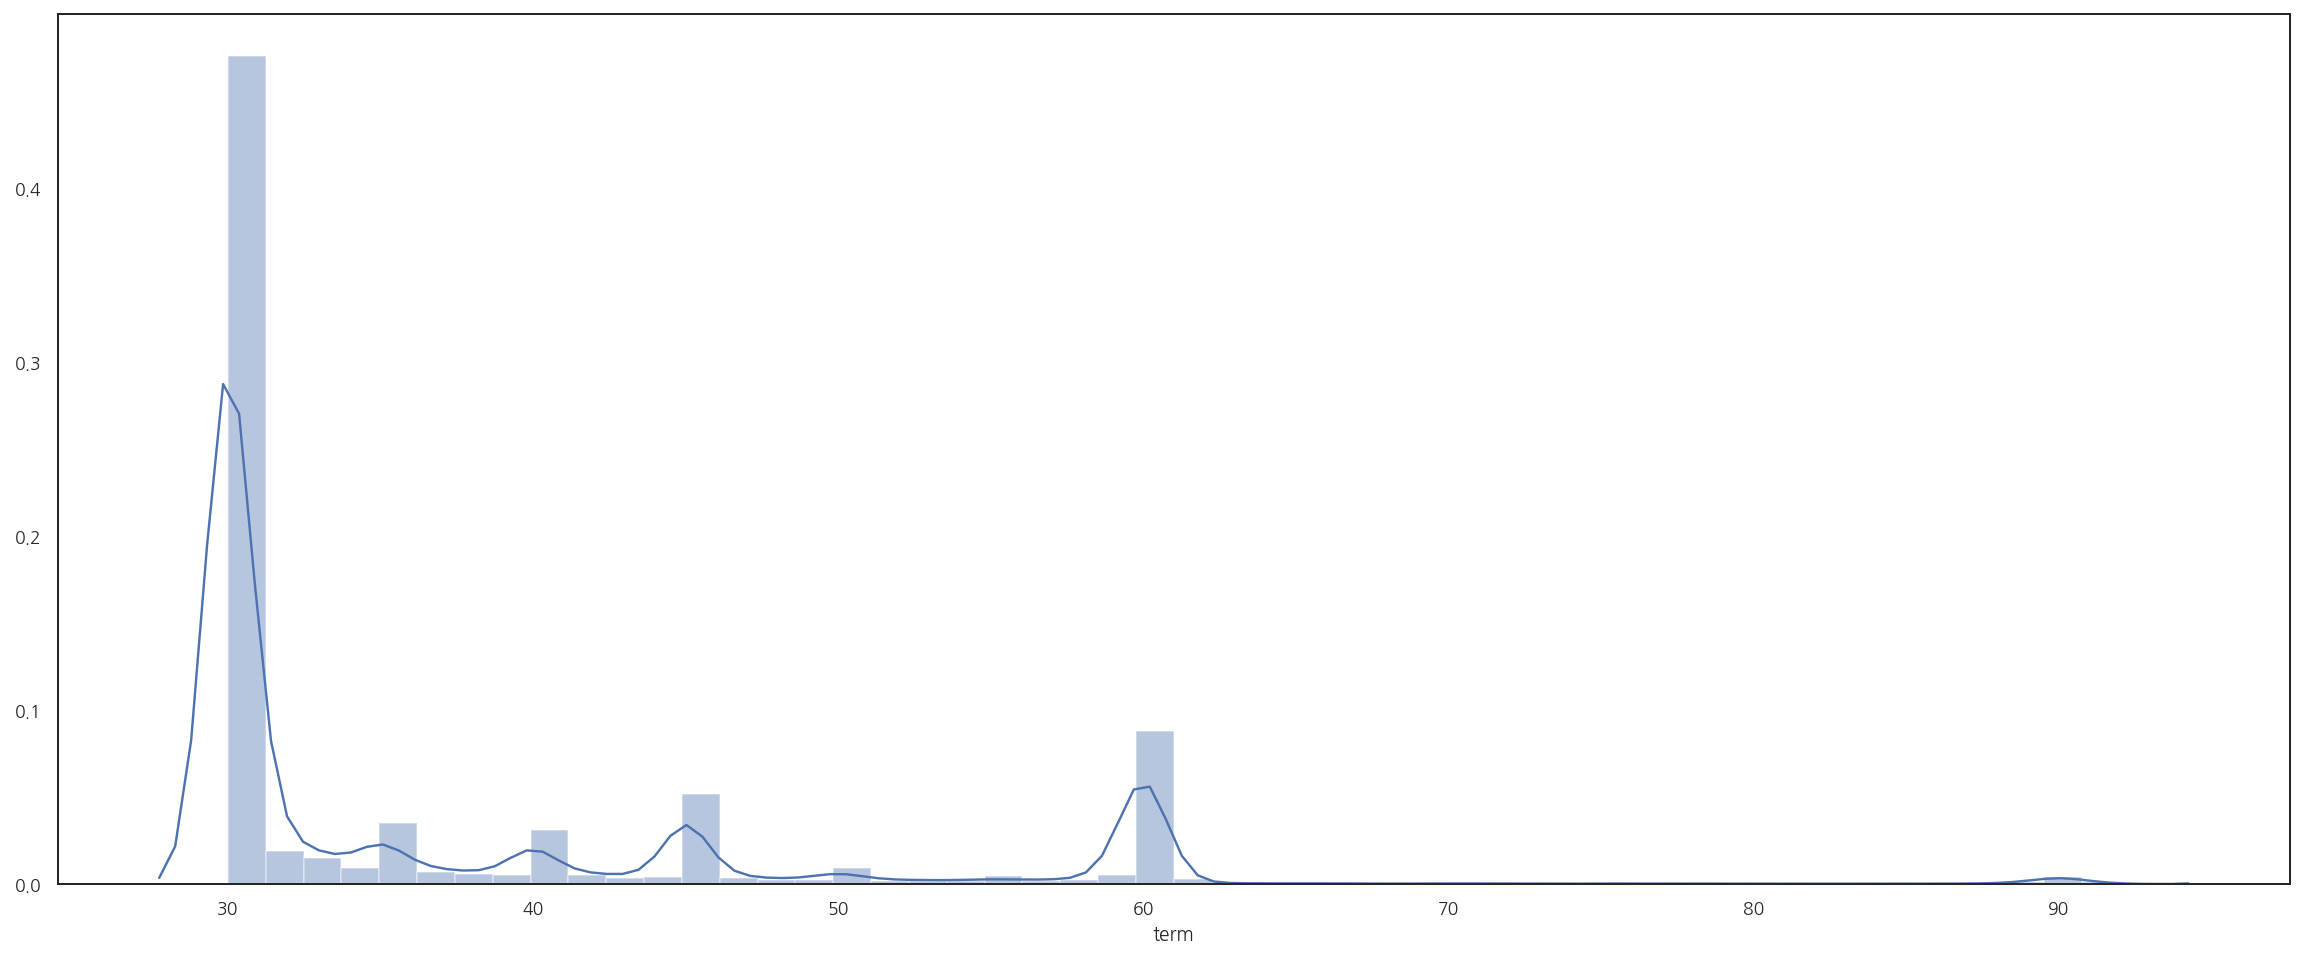

In [31]:
tmp2 = projects_new[lambda x: (x['term'] > 29)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['term'])

위의 시각화를 통해 얻은 insight를 바탕으로 10일 (1주) / 15일 (2주) / 21일 (3주) / 30일 (한 달) / 45일 (한 달 반) / 60일 (두 달) / 92일 (두 달 이상~세 달)을 기준으로 하여 펀딩 기간을 binning 한다. 

In [32]:
## 10일 (1주) / 15일 (2주) / 21일 (3주) / 30일 (한 달) / 45일 (한 달 반) / 60일 (두 달) / 92일 (두 달 이상~세 달)
projects_new['term_bin'] = projects_new.apply(lambda x: '1' if x['term'] <= 10
                                             else '2' if x['term'] <= 15
                                             else '3' if x['term'] <= 21
                                             else '4' if x['term'] <= 30
                                             else '5' if x['term'] <= 45
                                             else '6' if x['term'] <= 60
                                             else '7', axis = 1)

구간을 binning한 컬럼을 활용하여 그래프를 다시 그려보자. 구간이 92일에서 7개로 줄어 훨씬 결과를 확인하기 편해졌다.  

대부분의 프로젝트는 한달에서 2달 사이의 기간 동안 펀딩을 받고 있음을 확인할 수 있다.

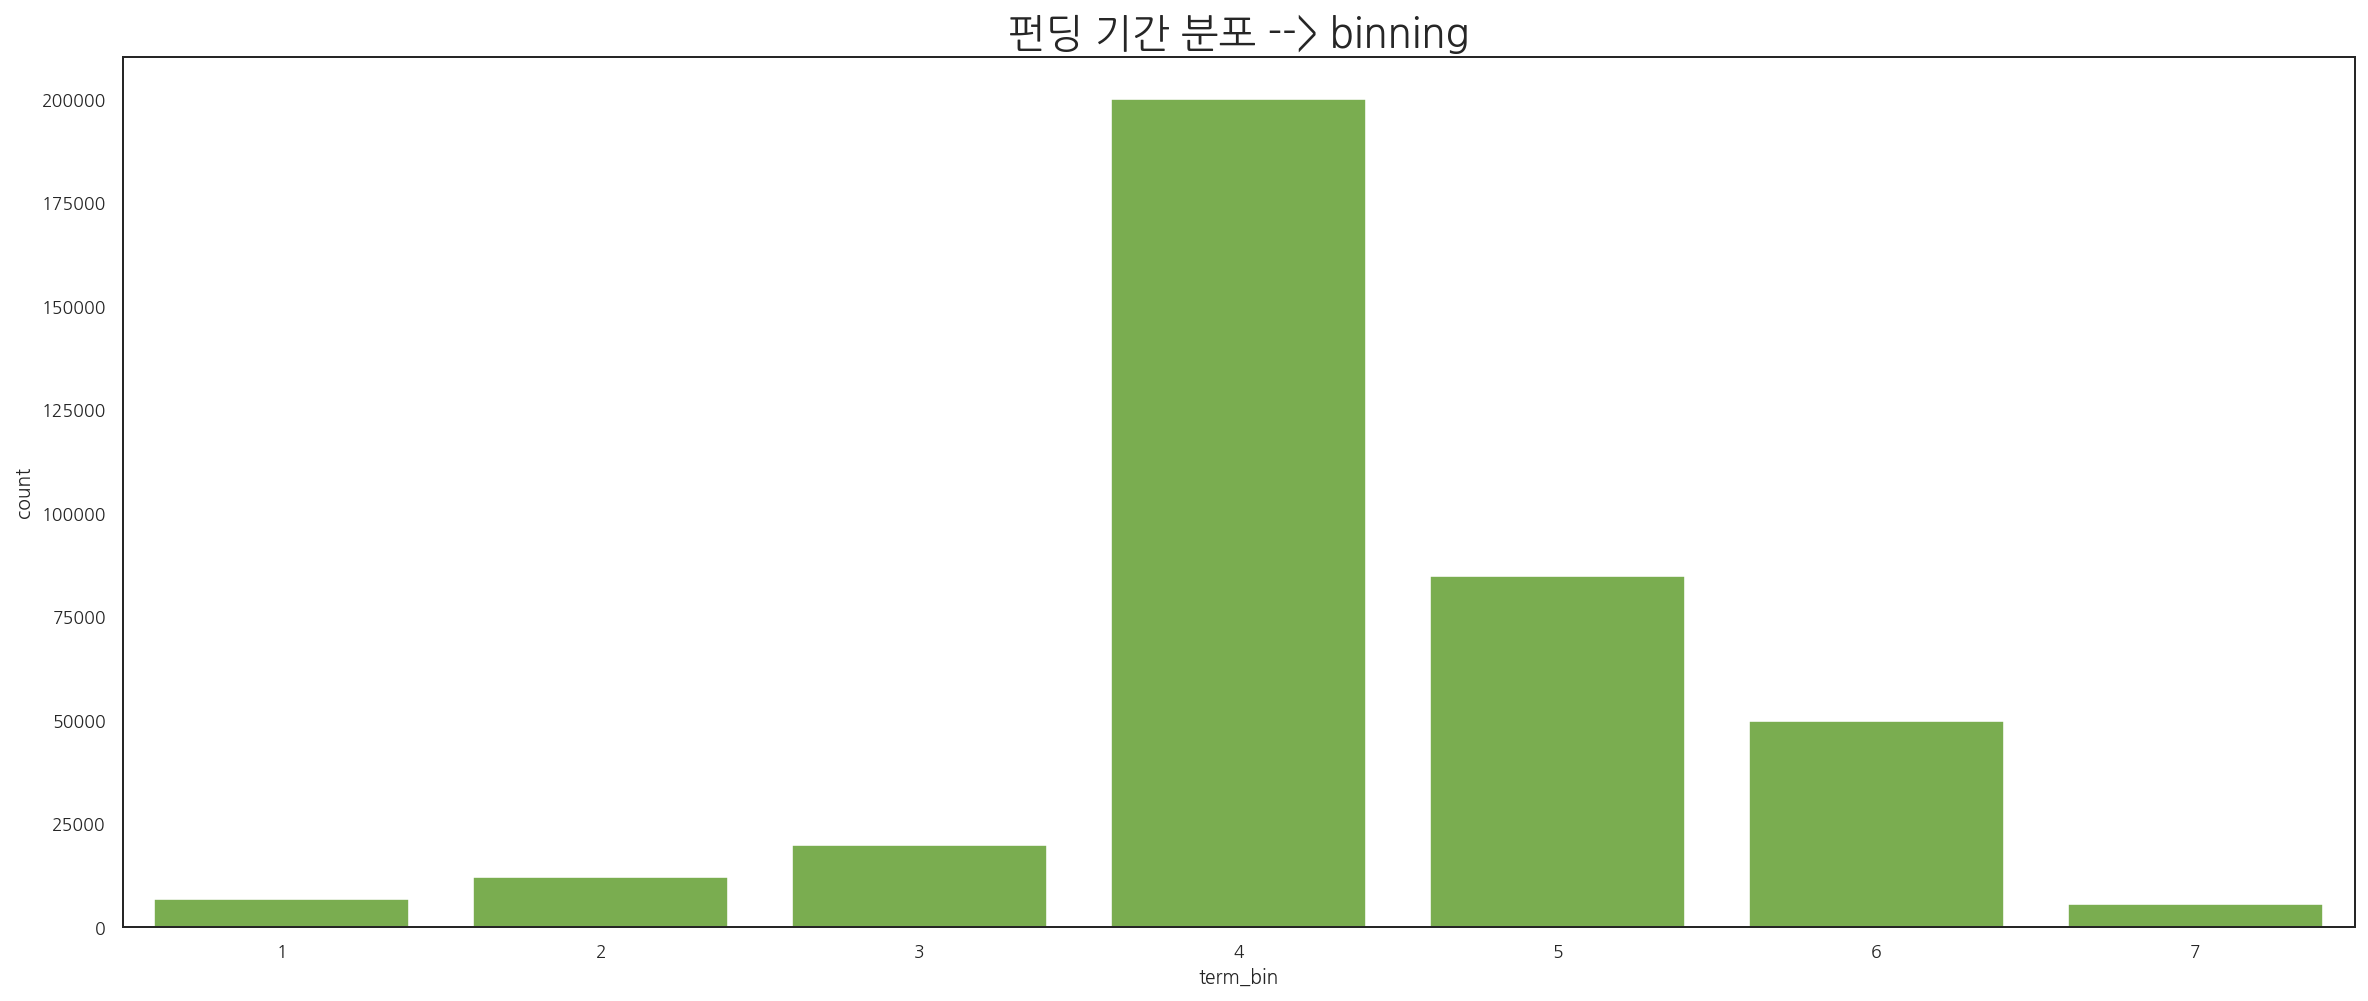

In [33]:
plt.figure(figsize=(20,8))
plt.title("펀딩 기간 분포 --> binning", fontsize = 20)
sns.countplot(x = 'term_bin', data = projects_new, color = '#78BD40')

하지만 재미있는 사실은 펀딩 기간이 길다고 해서 성공률도 높은 것은 아니라는 것이다. 아래의 그래프를 참고하면 오히려 펀딩 기간이 1달보다 적을 때 성공률이 가장 높다. 펀딩 기간이 1달이 넘어가면 성공률이 거의 평균 10% 정도 감소하였다. 가장 보편적인 펀딩 기간을 따른다고 해서 높은 성공률을 보장할 수 없다는 것을 알 수 있다.

In [45]:
percent_list = []

for i in range(7):
    percent = len(projects_new[lambda x: (x['term_bin'] == str(i+1)) & (x['state_new'] == 'success')]) / len(projects_new[lambda x: x['term_bin'] == str(i+1)]) * 100
    percent_list.append(percent)
    
tmp = pd.DataFrame({'bars' : ['1', '2', '3', '4', '5', '6', '7'], 
                    'percent' : percent_list})

In [46]:
tmp

,bars,percent
0,1,45.159403
1,2,47.683924
2,3,50.205302
3,4,34.775567
4,5,41.340031
5,6,23.710821
6,7,34.259598


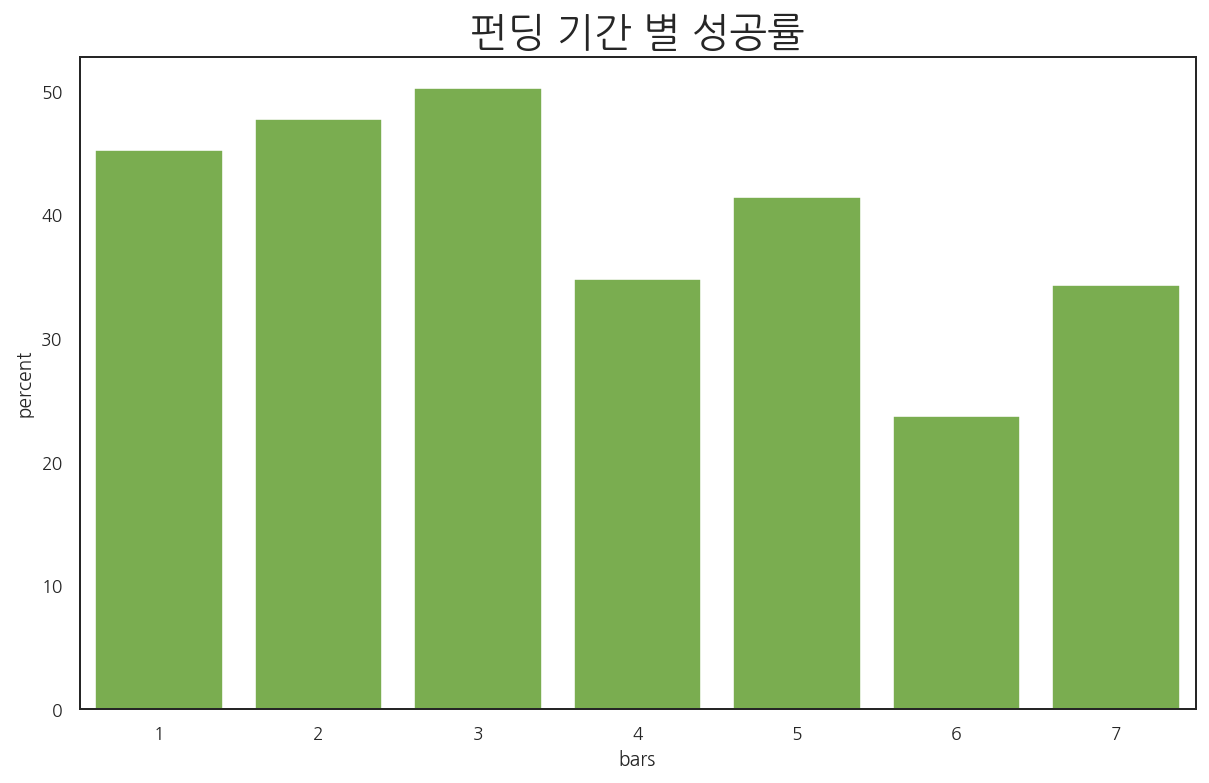

In [47]:
plt.figure(figsize=(10,6))
plt.title("펀딩 기간 별 성공률", fontsize = 20)
sns.barplot(x = "bars", y = "percent", data = tmp, color = '#78BD40')

### 4. usd_goal_real & use_pledged_real --> make "usd_goal_real_bin"

펀딩 목표 금액의 분포는 기간보다 더 심하게 넓게 분포되어있어 전체적인 추세를 확인하기 매우 어렵다. 펀딩 목표 금액도 기간과 마찬가지로 binning을 통해 빠르고 쉽게 전체적인 분포를 확인하고자 한다.

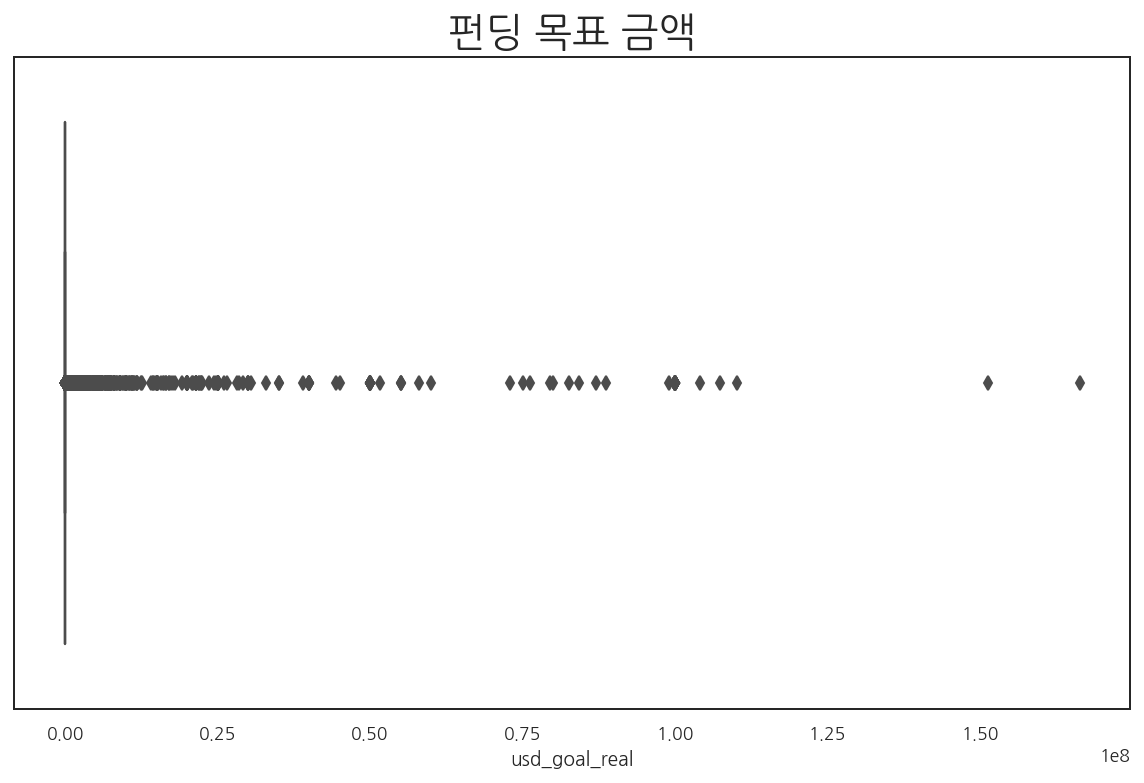

In [37]:
plt.figure(figsize=(10,6))
plt.title("펀딩 목표 금액", fontsize = 20)
sns.boxplot(x = projects_new['usd_goal_real'])

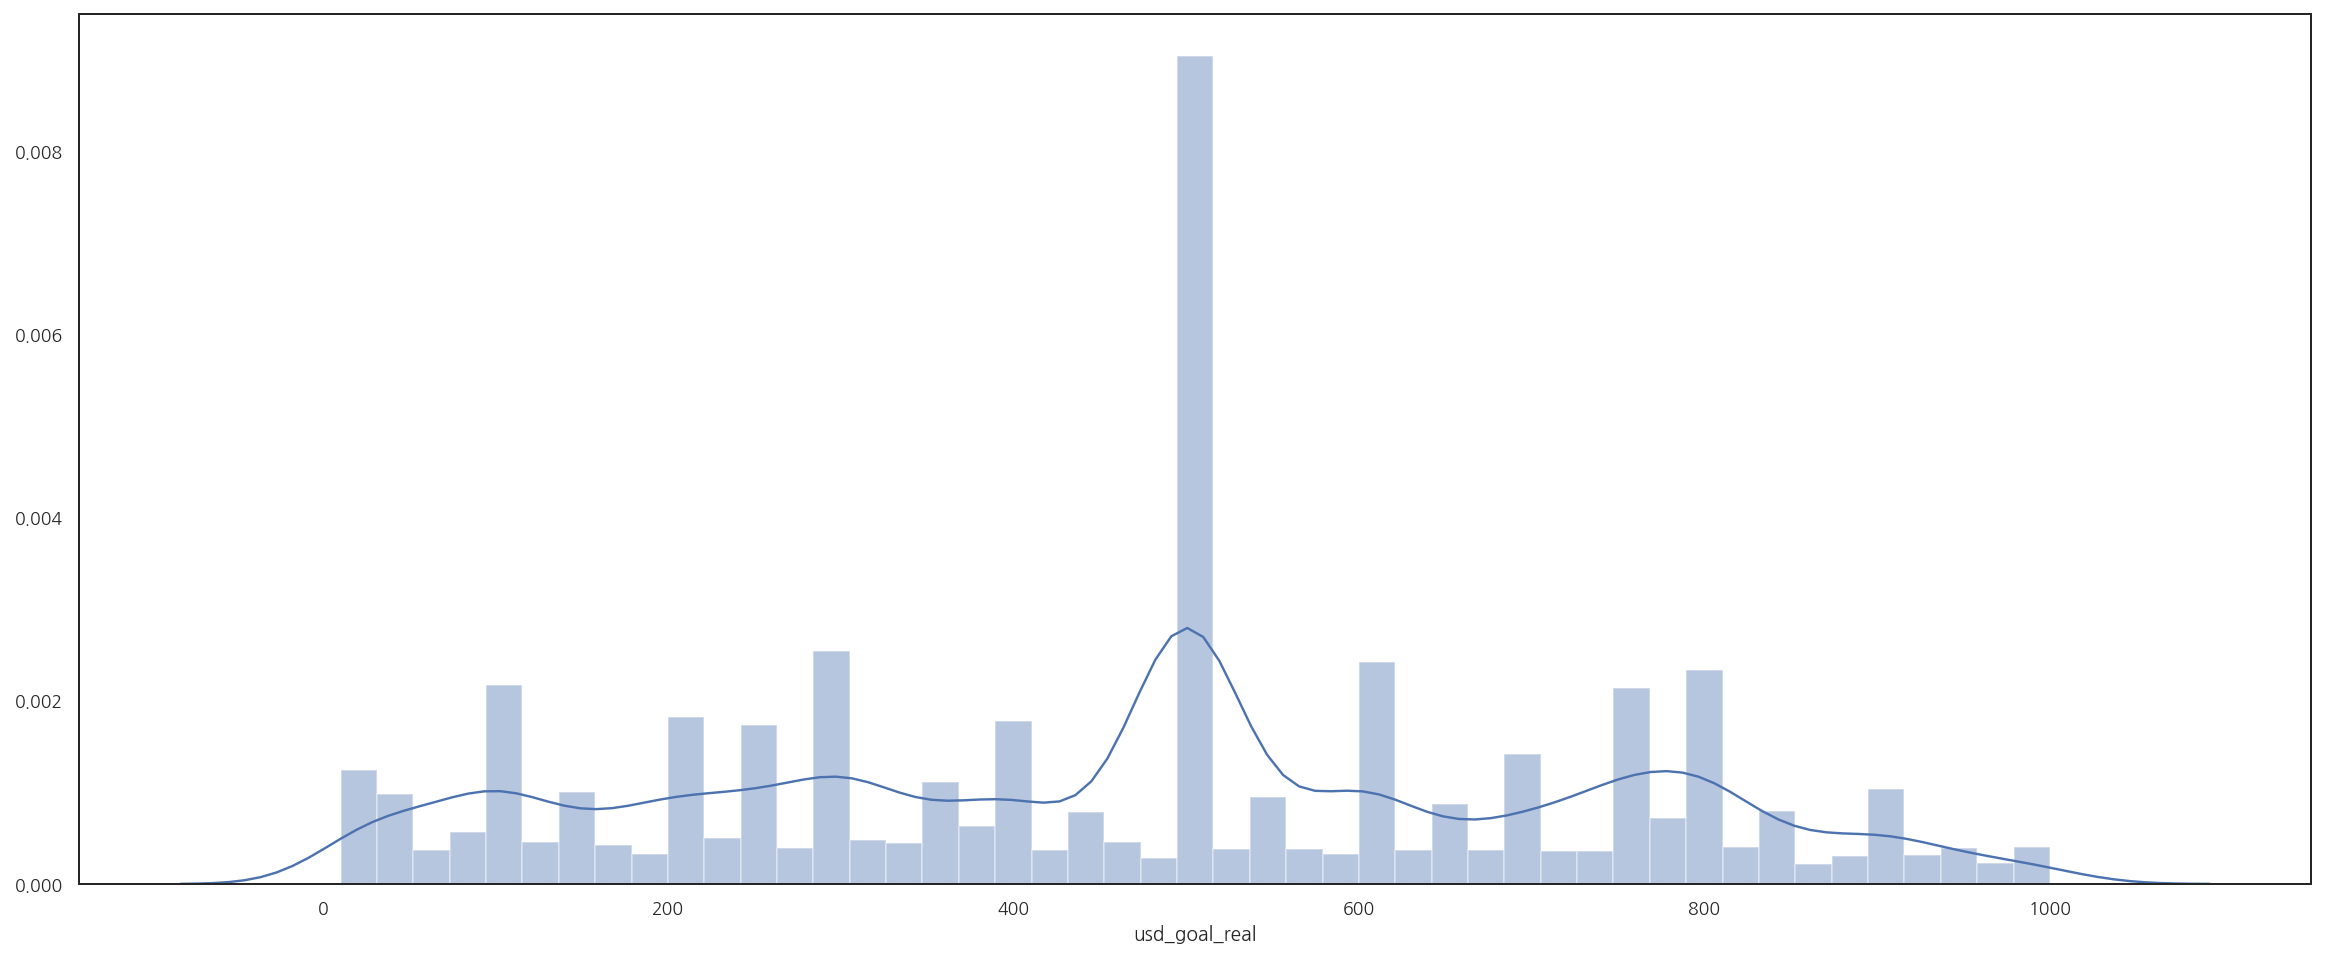

In [38]:
tmp2 = projects_new[lambda x: (x['usd_goal_real'] > 10) & (x['usd_goal_real'] < 1000)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['usd_goal_real'])

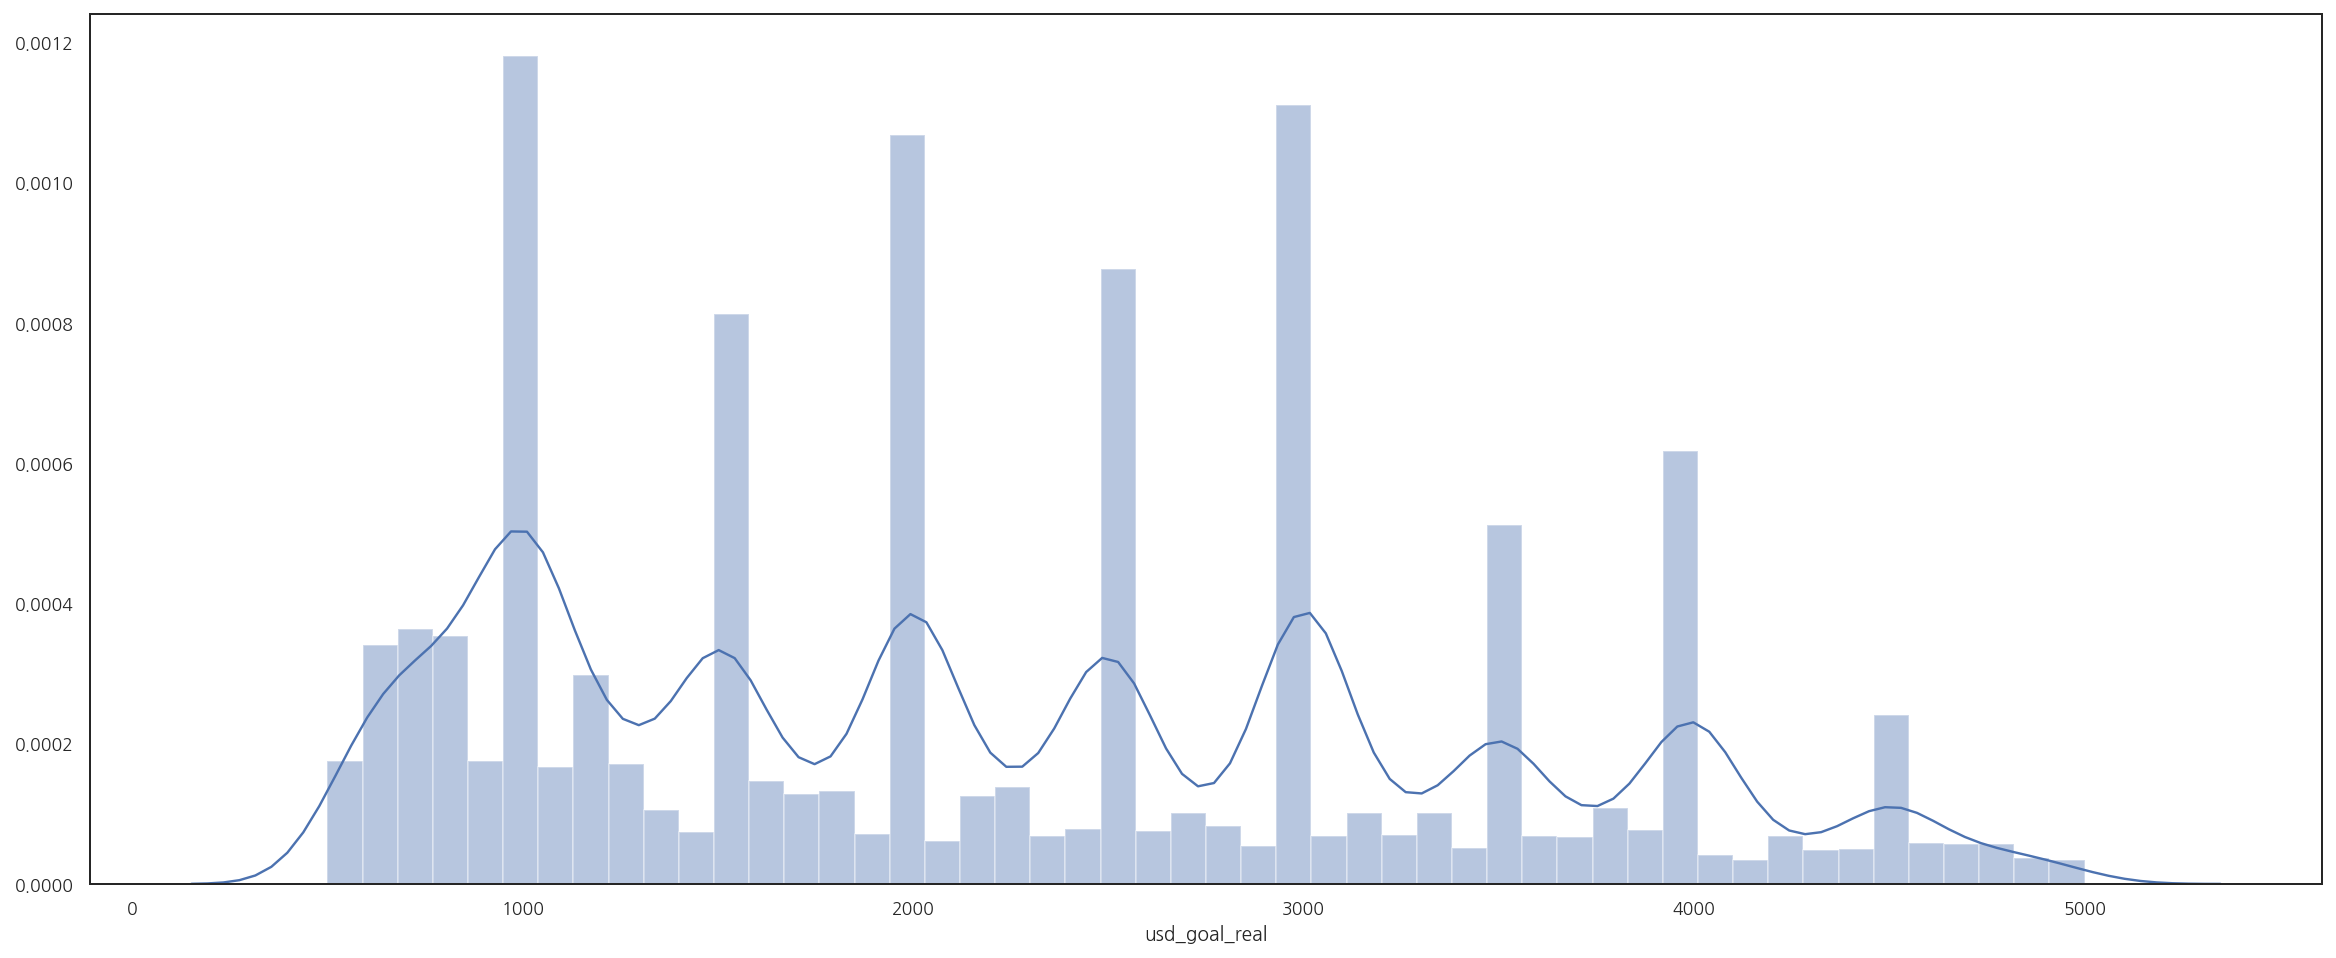

In [39]:
tmp2 = projects_new[lambda x: (x['usd_goal_real'] > 500) & (x['usd_goal_real'] < 5000)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['usd_goal_real'])

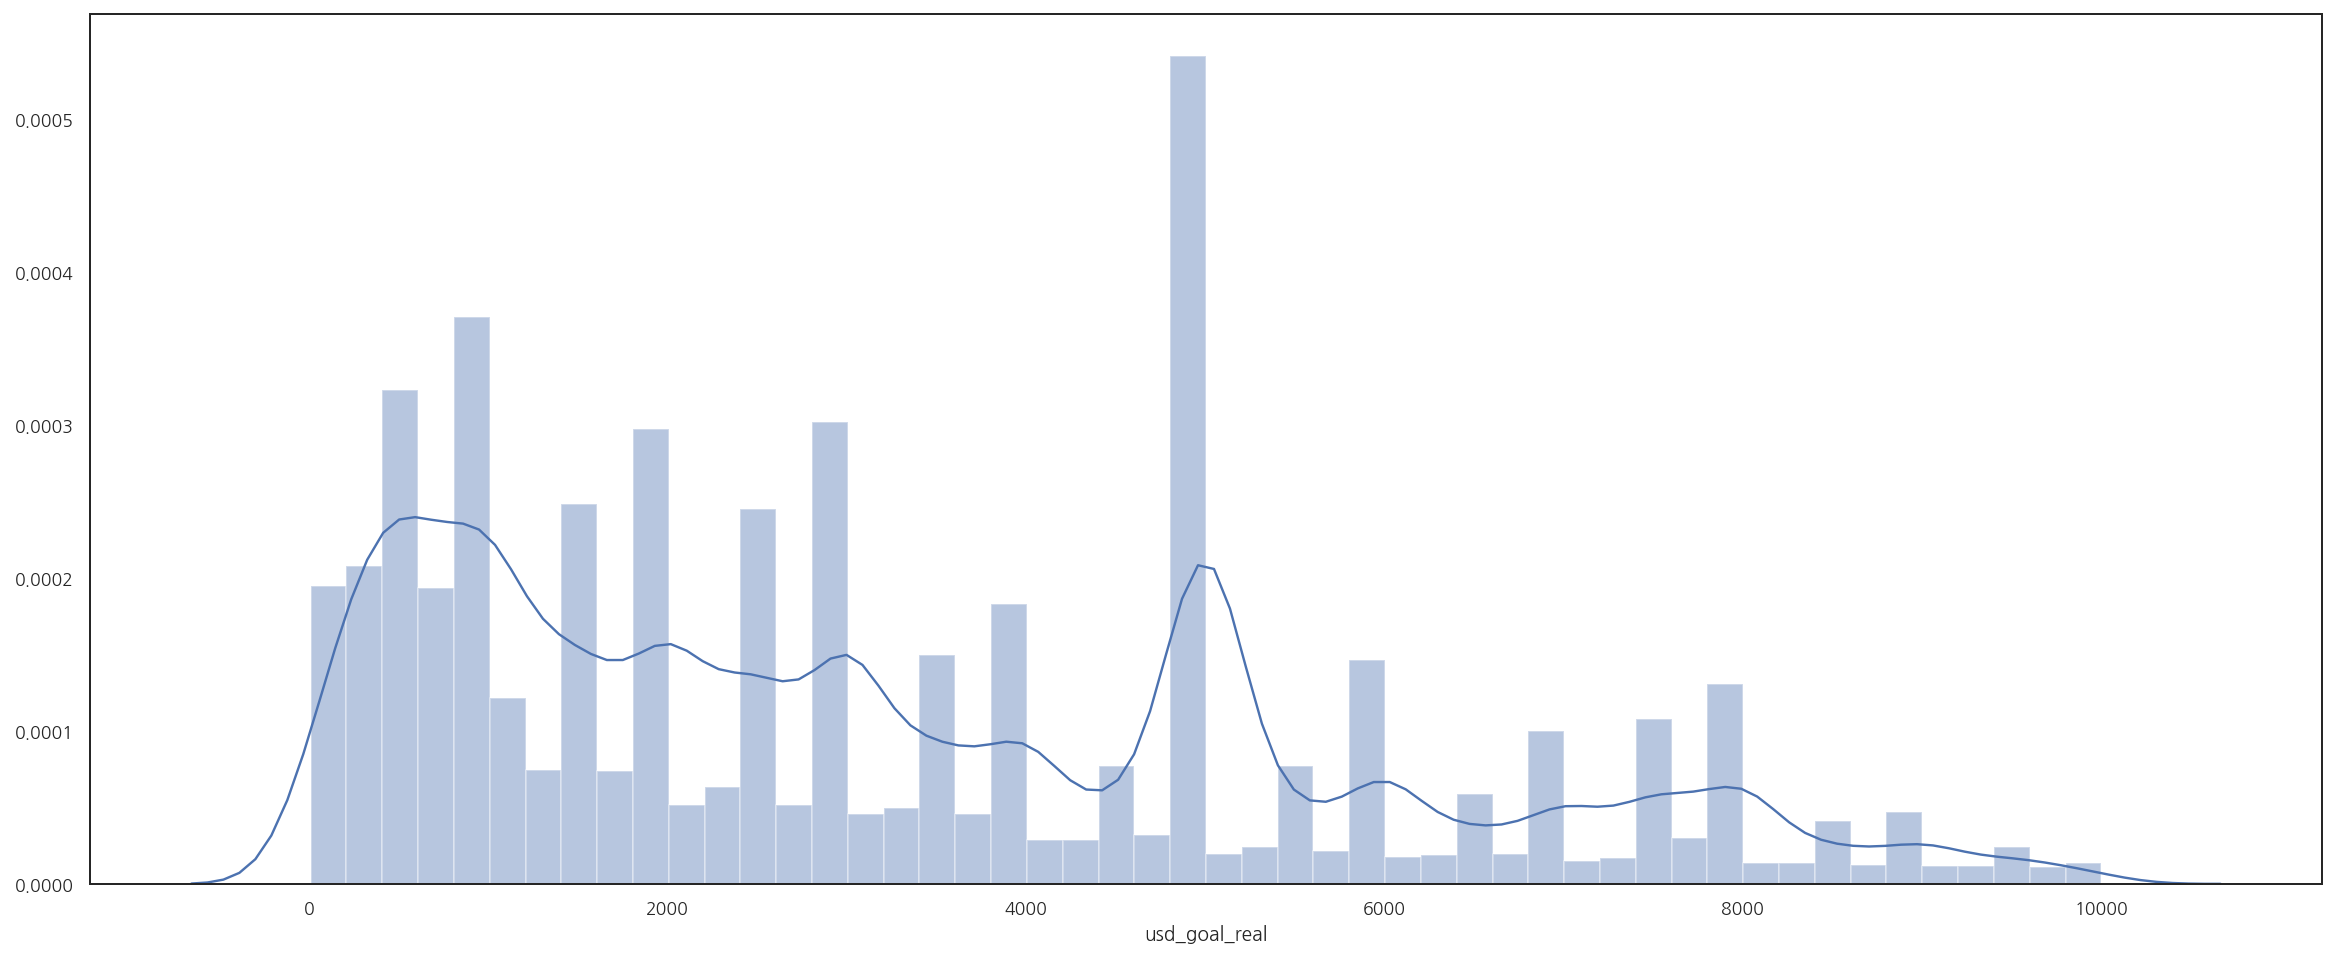

In [40]:
tmp2 = projects_new[lambda x: (x['usd_goal_real'] > 10) & (x['usd_goal_real'] < 10000)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['usd_goal_real'])

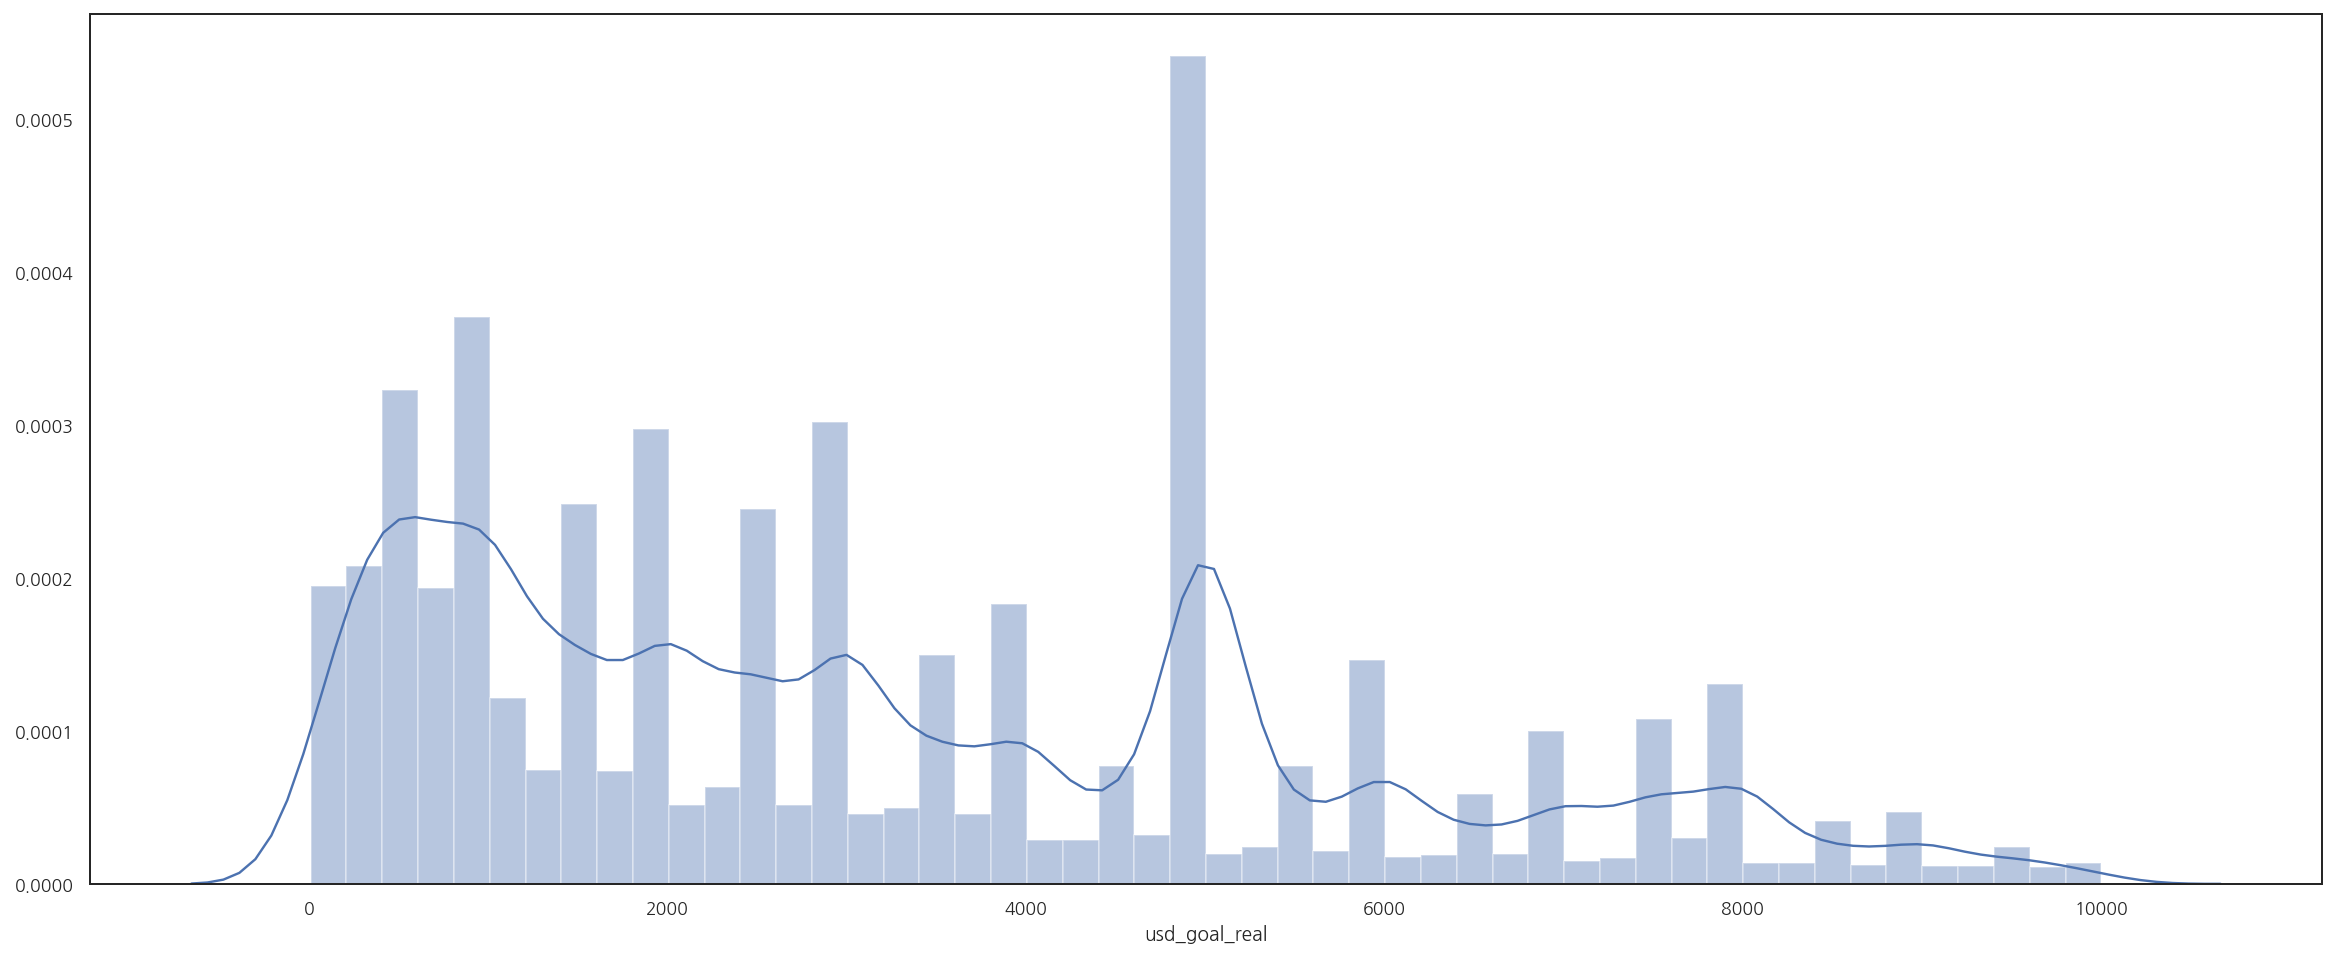

In [41]:
tmp2 = projects_new[lambda x: (x['usd_goal_real'] > 10) & (x['usd_goal_real'] < 10000)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['usd_goal_real'])

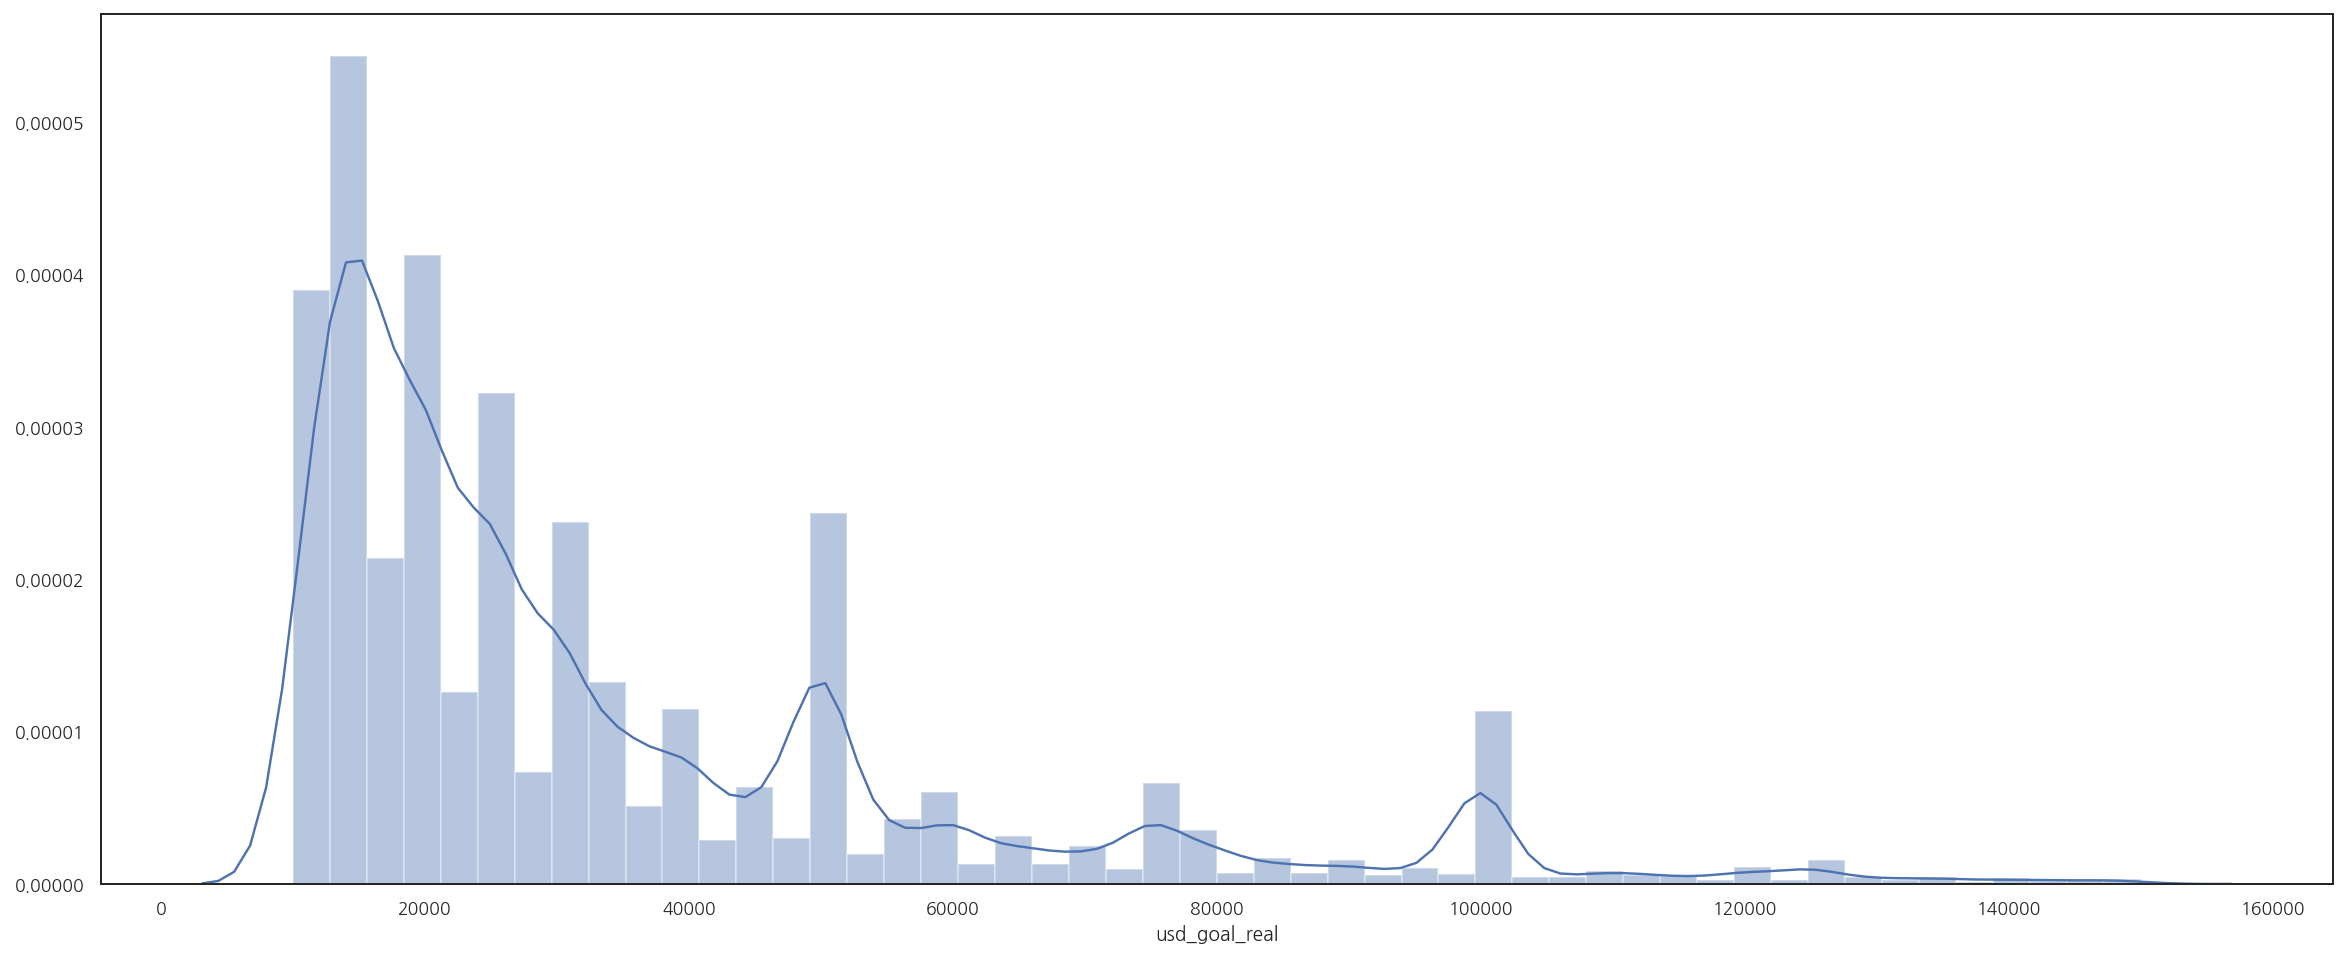

In [41]:
tmp2 = projects_new[lambda x: (x['usd_goal_real'] > 10000) & (x['usd_goal_real'] < 150000)]
plt.figure(figsize=(20,8))
sns.distplot(tmp2['usd_goal_real'])

우선 10만원 이하로 펀딩을 받는 경우는 거의 없다고 가정하고 해당 데이터를 지우는 전처리 작업을 수행한다.

In [50]:
# 10만원 이하로 펀딩 받는 경우는 지움
projects_fin = projects_new[projects_new['usd_goal_real'] > 100]

In [51]:
projects_fin = projects_fin.reset_index().drop(['index'], axis = 1)

또한 위에서 확인한 여러 distplot을 통해 500달러 / 1,000달러 / 3,000달러 / 5,000달러 / 10,000달러 / 50,000달러 / 100,000달러를 기준으로 펀딩 목표 금액을 binning한다.

In [52]:
# 500 / 천 / 3천 / 5천 / 1만 / 5만 / 10만
projects_fin['usd_goal_real_bin'] = projects_fin.apply(lambda x: '1' if x['usd_goal_real'] <= 500
                                                       else '2' if x['usd_goal_real'] <= 1000
                                                       else '3' if x['usd_goal_real'] <= 3000
                                                       else '4' if x['usd_goal_real'] <= 5000
                                                       else '5' if x['usd_goal_real'] <= 10000
                                                       else '6' if x['usd_goal_real'] <= 50000
                                                       else '7' if x['usd_goal_real'] <= 100000
                                                       else '8', axis = 1)

구간을 binning한 컬럼을 활용하여 그래프를 다시 그려보면 펀딩 목표 금액이 커질수록 프로젝트의 성공률이 작아짐을 확인할 수 있다.

In [53]:
percent_list = []

for i in range(8):
    percent = len(projects_fin[lambda x: (x['usd_goal_real_bin'] == str(i+1)) & (x['state_new'] == 'success')]) / len(projects_fin[lambda x: x['usd_goal_real_bin'] == str(i+1)]) * 100
    percent_list.append(percent)
    
tmp = pd.DataFrame({'bars' : ['1', '2', '3', '4', '5', '6', '7', '8'], 
                    'percent' : percent_list})

In [54]:
tmp

,bars,percent
0,1,51.367244
1,2,47.717284
2,3,45.546074
3,4,39.420448
4,5,35.550911
5,6,26.887752
6,7,14.057723
7,8,5.865658


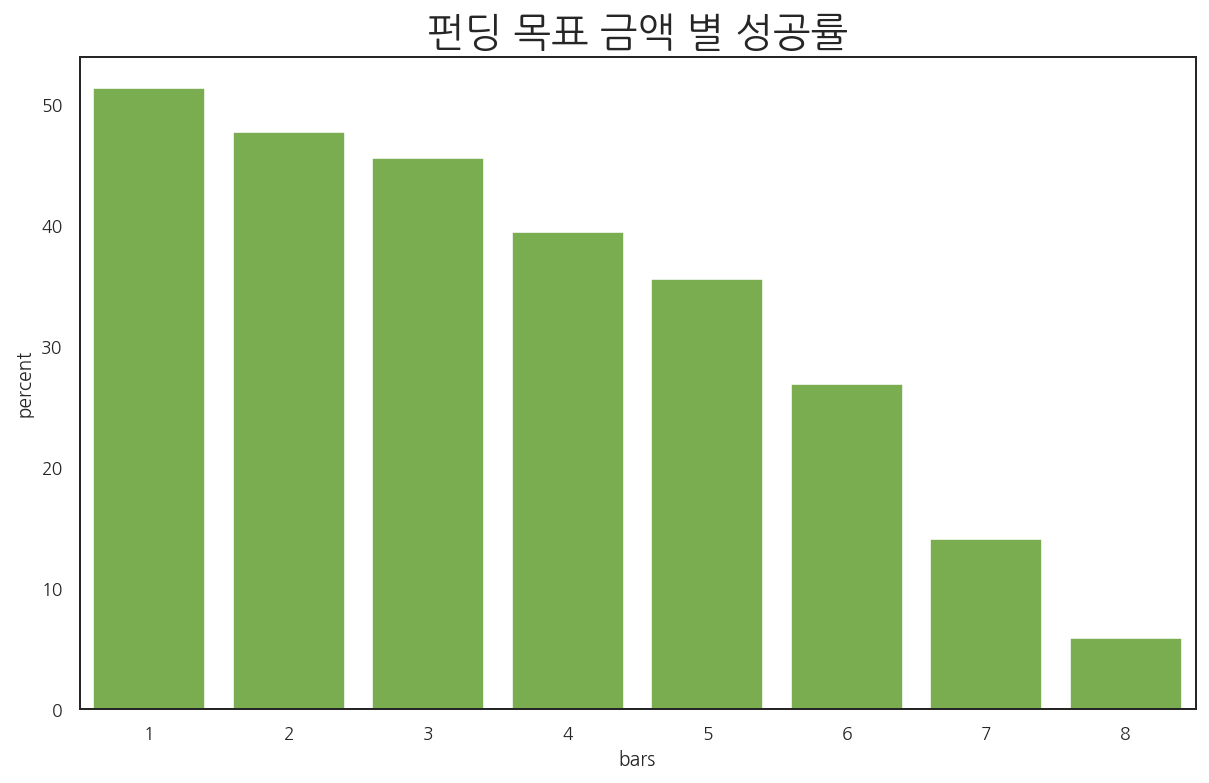

In [55]:
plt.figure(figsize=(10,6))
plt.title("펀딩 목표 금액 별 성공률", fontsize = 20)
sns.barplot(x = "bars", y = "percent", data = tmp, color = '#78BD40')

## Save New Data
------------------

전처리가 끝난 새로운 데이터를 projects_fin.csv의 이름으로 저장하고 전처리를 마무리한다.

In [ ]:
projects_fin.to_csv("projects_fin.csv")